In [1]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('notebook') 
#set maximun display columns to 99
pd.options.display.max_columns=100
pd.options.display.max_rows=1000

## 1. Data Pre-processing

In [101]:
#read in the data
data=pd.read_csv("Clothing_Store.csv")
print(data.columns)
print(len(data))

Index(['HHKEY', 'ZIP_CODE', 'REC', 'FRE', 'MON', 'CC_CARD', 'AVRG',
       'PC_CALC20', 'PSWEATERS', 'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES',
       'PJACKETS', 'PCAR_PNTS', 'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS',
       'POUTERWEAR', 'PJEWELRY', 'PFASHION', 'PLEGWEAR', 'PCOLLSPND',
       'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND', 'TMONSPEND', 'OMONSPEND',
       'SMONSPEND', 'PREVPD', 'GMP', 'PROMOS', 'DAYS', 'FREDAYS', 'MARKDOWN',
       'CLASSES', 'COUPONS', 'STYLES', 'STORES', 'STORELOY', 'VALPHON', 'WEB',
       'MAILED', 'RESPONDED', 'RESPONSERATE', 'HI', 'LTFREDAY', 'CLUSTYPE',
       'PERCRET', 'RESP'],
      dtype='object')
21740


In [3]:
data.head(5)

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,STORELOY,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,9955600066402,1001,208,2,368.46,0,184.23,11,0.18,0.00,0.00,0.30,0.0,0.25,0.00,0.19,0.00,0.0,0.0,0.000000,0.02,0.03,0.29,0.0,0.0,368.46,0.0,0.00,0.00,0.00,0.00,0.60,17,666,333.00,0.08,9,1,11,1,7,N,0,5,0,0.00,31.81,111.00,10,0.00,0
1,9955600073501,1028,6,4,258.00,1,64.50,11,0.26,0.16,0.00,0.00,0.0,0.18,0.14,0.00,0.18,0.0,0.0,0.000000,0.00,0.02,0.37,0.0,0.0,258.00,0.0,138.00,55.99,258.00,0.00,0.54,14,696,174.00,0.33,6,0,14,1,7,Y,0,4,2,50.00,32.72,43.50,10,0.03,1
2,9955600076313,1056,327,2,77.00,0,38.50,11,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.0,0.0,77.00,0.0,0.00,0.00,0.00,39.00,0.62,10,343,171.50,0.11,1,0,2,1,7,N,0,4,0,0.00,100.00,68.60,16,0.00,0
3,9955600078045,1118,66,8,846.06,1,105.75,11,0.38,0.00,0.05,0.06,0.2,0.17,0.00,0.05,0.00,0.0,0.0,0.005307,0.03,0.01,0.00,0.0,0.0,846.06,0.0,104.94,0.00,373.87,166.25,0.43,24,701,87.62,0.29,15,3,35,1,7,Y,0,9,6,66.67,23.27,26.96,10,0.00,0
4,9955600078517,1107,49,1,87.44,0,87.44,11,0.20,0.20,0.00,0.00,0.0,0.00,0.41,0.00,0.00,0.0,0.0,0.170000,0.00,0.00,0.00,0.0,0.0,87.44,0.0,87.44,0.00,87.44,0.00,0.22,0,49,49.00,0.42,4,0,8,1,7,Y,0,0,0,0.00,28.52,24.50,20,0.00,0


### 1.1 Turn ZIP_CODE to categorical variables

In [4]:
#Turn ZIP_CODE to categorical variables
for index, row in data.iterrows():
    zc= str(row['ZIP_CODE'])
    if(len(zc)==5):
        zc=zc[0]
        zc=zc+"0000~"+zc+"9999"
        data.loc[index, 'ZIP_CODE']= zc
    elif(len(zc)<=4):
        zc="0~9999"
        data.loc[index, 'ZIP_CODE']= zc 

In [5]:
data['ZIP_CODE'].value_counts()

60000~69999    3262
40000~49999    3179
30000~39999    3170
70000~79999    2828
20000~29999    2242
50000~59999    2133
10000~19999    1617
90000~99999    1369
0~9999         1211
80000~89999     729
Name: ZIP_CODE, dtype: int64

### 1.2 Get the index of the numerical predictors, categorical predictors and respond

In [6]:
num_predictors=[ 
    #Number of purchase visit
    'FRE',
    #Total net sales?

    #Average amount spent per visit
    'AVRG',
    #Amount spent for each of 4 franchises:
    'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND',
    #Amount spent in the past month, the past three months, and the past six months         
    'TMONSPEND', 'OMONSPEND','SMONSPEND',
    #Amount spent the same period last year?
    
    #Gross margin percentage
    'GMP',
    #Number of marketing promotions on file.
    'PROMOS',
    #Number of days the customer has been on file.
    'DAYS',
    #Number of days between purchases.
    'FREDAYS',
    #Markdown percentage on customer purchases.
    'MARKDOWN',
    #Number of different product classes purchased.
    'CLASSES', 
    #Number of coupons used by the customer.
    'COUPONS', 
    #Total number of individual items purchased by the customer.
    'STYLES', 
    #Number of stores the customer purchased at.
    'STORES',
    #Number of promotions mailed in the last year.
    'MAILED', 
    #Number of promotions responded to in the past year.
    'RESPONDED',
    #Promotion response rate for the past year.
    'RESPONSERATE', 
    #Product uniformity (low score = diverse spending patterns)?   
    
    #Lifetime average time between visits.
    'LTFREDAY',    
    #Percent of returns.
    'PERCRET',    
    #15 variables providing the percentages spent by the customer on specific classes of clothing.    
    'PSWEATERS', 'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES',
    'PJACKETS', 'PCAR_PNTS', 'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 
    'PSUITS', 'POUTERWEAR', 'PJEWELRY', 'PFASHION', 'PLEGWEAR', 
    'PCOLLSPND', 
    #unidentified? 
    'REC',
    'MON',
    'PC_CALC20', 
    'PREVPD', 
    'STORELOY', 
    'HI',    
    ]
cat_predictors=[
    'ZIP_CODE', 
    #Flag: credit card user.
    'CC_CARD',
    #Flag: valid phone number on file.
    'VALPHON',
    #Flag: web shopper.
    'WEB',
    #Microvision lifestyle cluster type (market segmentation category defined by Claritas Demographics).
    'CLUSTYPE']
response='RESP'

### 1.3 Create dummy variables for categorical predictors with more than 2 level

In [7]:
#Categorical Encoding of the input variables
cols_to_transform = ['ZIP_CODE','CLUSTYPE'] 
cat_encoded_data = pd.get_dummies(data, columns = cols_to_transform)
for c in cat_encoded_data.columns:
    print(c)

HHKEY
REC
FRE
MON
CC_CARD
AVRG
PC_CALC20
PSWEATERS
PKNIT_TOPS
PKNIT_DRES
PBLOUSES
PJACKETS
PCAR_PNTS
PCAS_PNTS
PSHIRTS
PDRESSES
PSUITS
POUTERWEAR
PJEWELRY
PFASHION
PLEGWEAR
PCOLLSPND
AMSPEND
PSSPEND
CCSPEND
AXSPEND
TMONSPEND
OMONSPEND
SMONSPEND
PREVPD
GMP
PROMOS
DAYS
FREDAYS
MARKDOWN
CLASSES
COUPONS
STYLES
STORES
STORELOY
VALPHON
WEB
MAILED
RESPONDED
RESPONSERATE
HI
LTFREDAY
PERCRET
RESP
ZIP_CODE_0~9999
ZIP_CODE_10000~19999
ZIP_CODE_20000~29999
ZIP_CODE_30000~39999
ZIP_CODE_40000~49999
ZIP_CODE_50000~59999
ZIP_CODE_60000~69999
ZIP_CODE_70000~79999
ZIP_CODE_80000~89999
ZIP_CODE_90000~99999
CLUSTYPE_0
CLUSTYPE_1
CLUSTYPE_2
CLUSTYPE_3
CLUSTYPE_4
CLUSTYPE_5
CLUSTYPE_6
CLUSTYPE_7
CLUSTYPE_8
CLUSTYPE_9
CLUSTYPE_10
CLUSTYPE_11
CLUSTYPE_12
CLUSTYPE_13
CLUSTYPE_14
CLUSTYPE_15
CLUSTYPE_16
CLUSTYPE_17
CLUSTYPE_18
CLUSTYPE_19
CLUSTYPE_20
CLUSTYPE_21
CLUSTYPE_22
CLUSTYPE_23
CLUSTYPE_24
CLUSTYPE_25
CLUSTYPE_26
CLUSTYPE_27
CLUSTYPE_28
CLUSTYPE_29
CLUSTYPE_30
CLUSTYPE_31
CLUSTYPE_32
CLUSTYPE_33
CLUSTY

### 1.4 Convert "Y", "N" to 1 and 0 for Variable VALPHON 

In [8]:
cat_encoded_data['VALPHON'].head(5)
#print(cat_encoded_data.loc[0, 'VALPHON'])

0    N
1    Y
2    N
3    Y
4    Y
Name: VALPHON, dtype: object

In [9]:
for index, row in cat_encoded_data.iterrows():
    if(row['VALPHON']=='Y'):
        #print(row['VALPHON'])
        #print(index)
        cat_encoded_data.loc[index, 'VALPHON']=1
    elif(row['VALPHON']=='N'):
        cat_encoded_data.loc[index, 'VALPHON']=0
cat_encoded_data['VALPHON'].head(5)      

0    0
1    1
2    0
3    1
4    1
Name: VALPHON, dtype: object

### 1.4 Data Cleaning

#### 1.3.1 Drop row if missing value exists

In [10]:
cat_encoded_data.dropna(axis=0, inplace=True)
len(cat_encoded_data)
#no data entry is cleaned in this step

21740

#### 1.3.2 Drop row if the precentage variables are not between scale [0, 1]

In [11]:
#get all the percentage variables
percent_vars=[
    #Gross margin percentage
    'GMP',
    #Markdown percentage on customer purchases.
    'MARKDOWN',
    #Percent of returns.
    'PERCRET',    
    #15 variables providing the percentages spent by the customer on specific classes of clothing.    
    'PSWEATERS', 'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES',
    'PJACKETS', 'PCAR_PNTS', 'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 
    'PSUITS', 'POUTERWEAR', 'PJEWELRY', 'PFASHION', 'PLEGWEAR', 
    'PCOLLSPND', 
]
clean_Data=cat_encoded_data.copy()
#for each percentage variable:
for pv in percent_vars:
    clean_Data=clean_Data[(clean_Data[pv]<=1.0)&(clean_Data[pv]>=0.0)]
print("Number of data entries left:")
print(len(clean_Data))
print("Number of data entries cleaned:")
print(len(cat_encoded_data)-len(clean_Data))

Number of data entries left:
21196
Number of data entries cleaned:
544


#### 1.3.3 Find and drop outliners (numerical variables) 

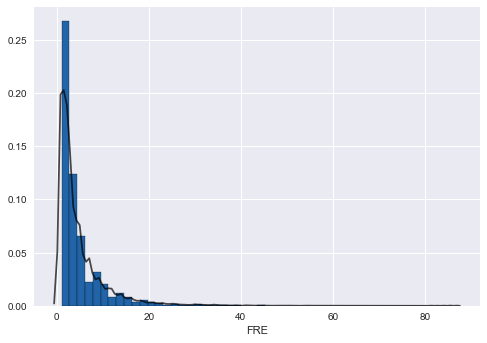

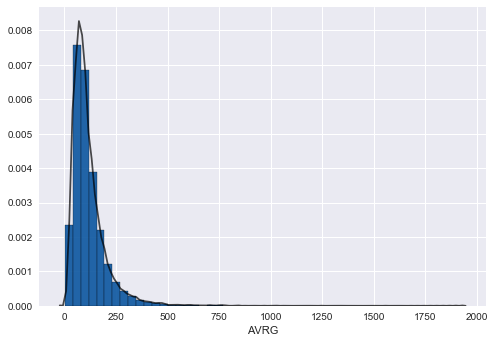

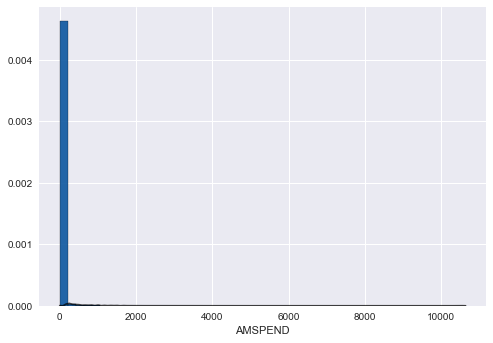

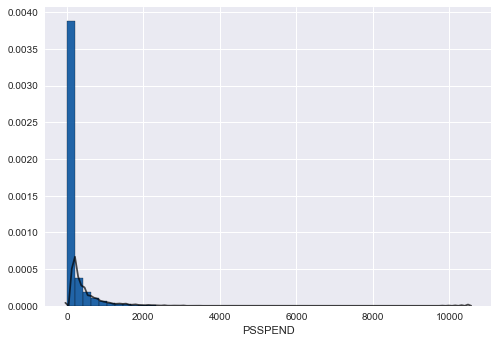

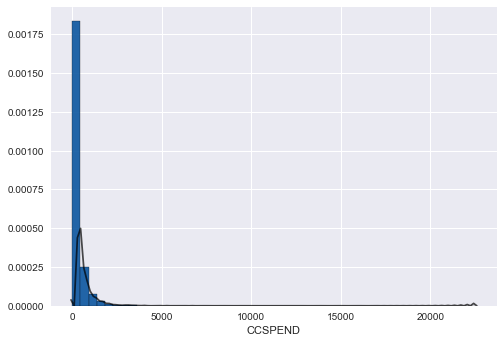

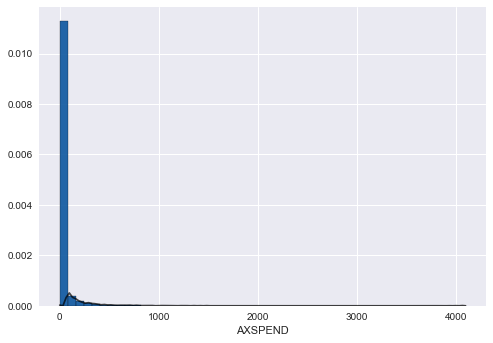

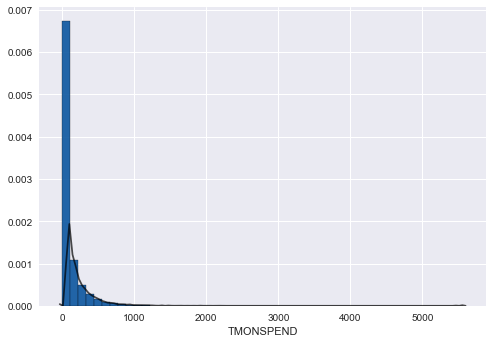

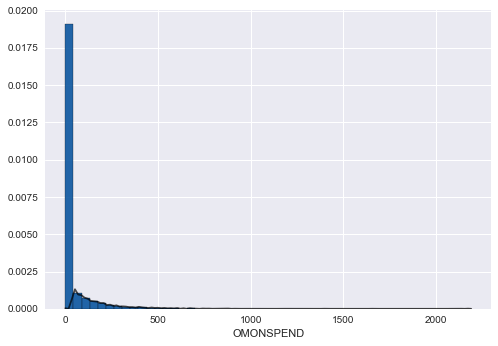

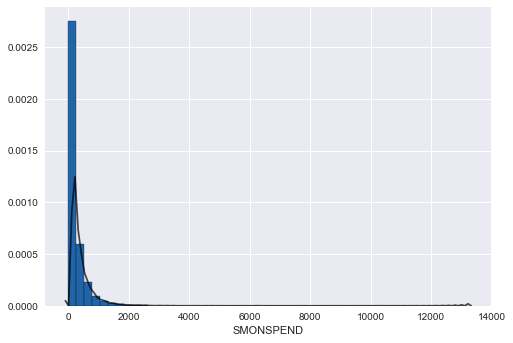

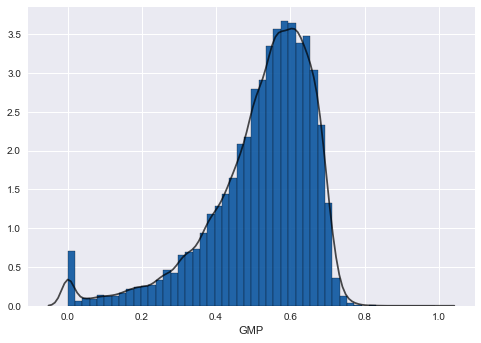

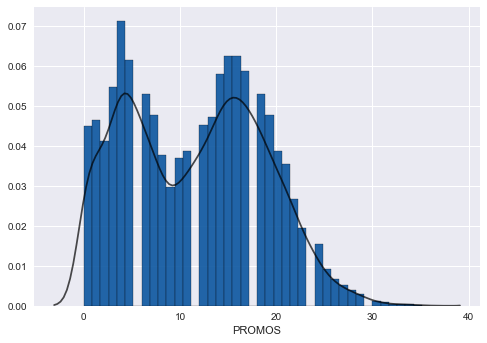

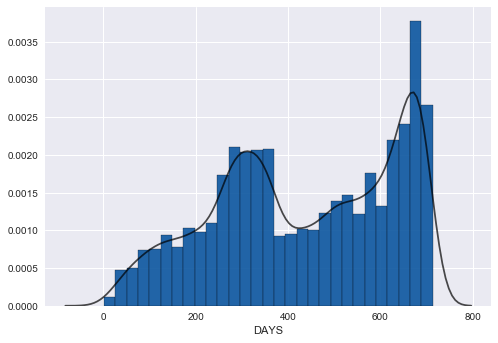

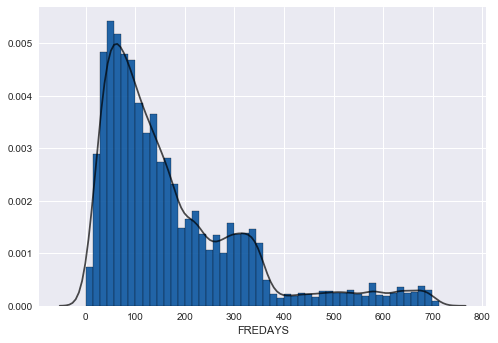

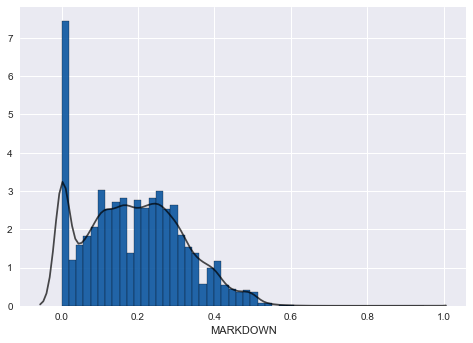

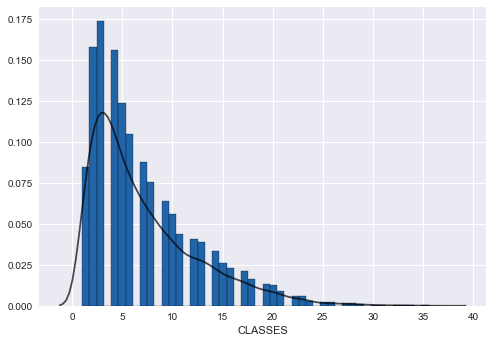

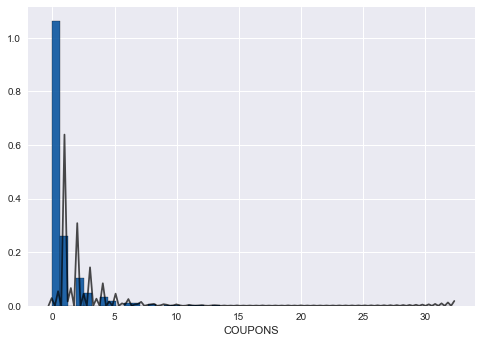

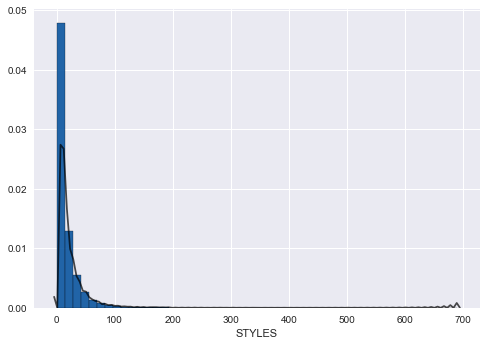

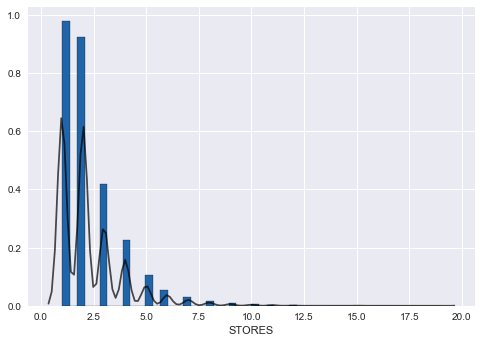

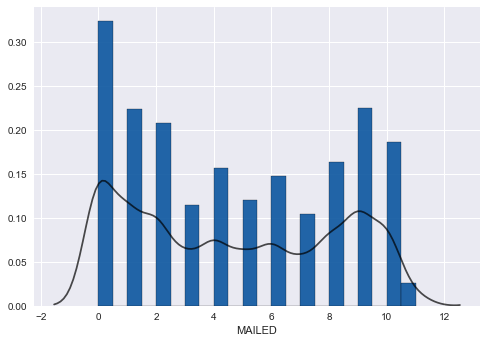

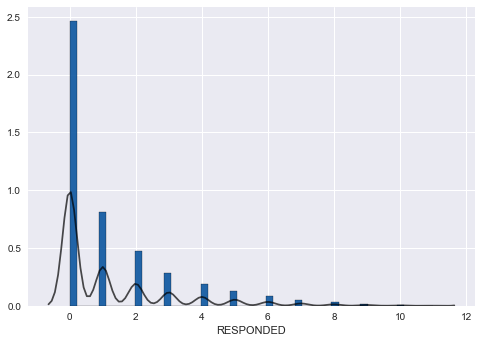

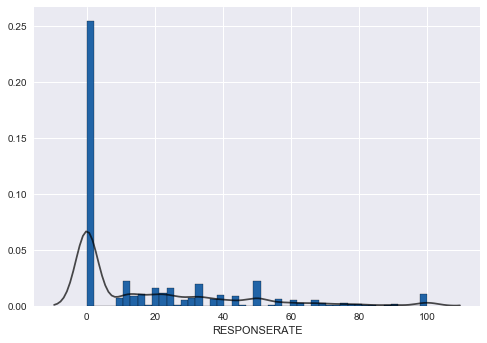

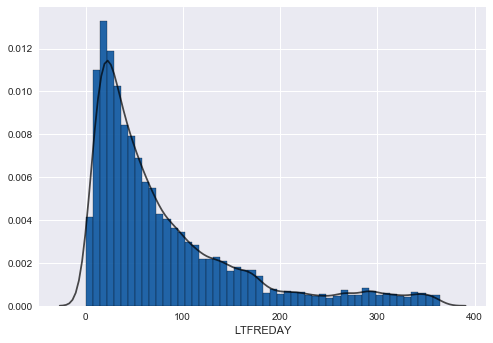

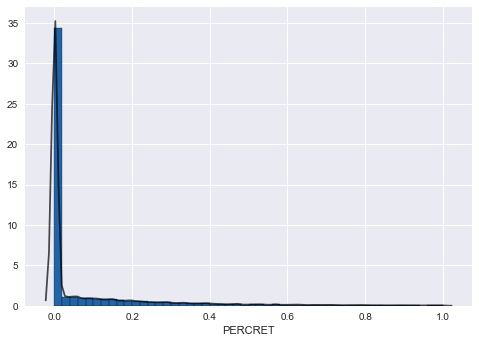

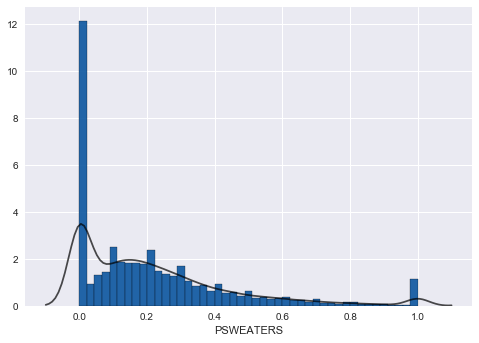

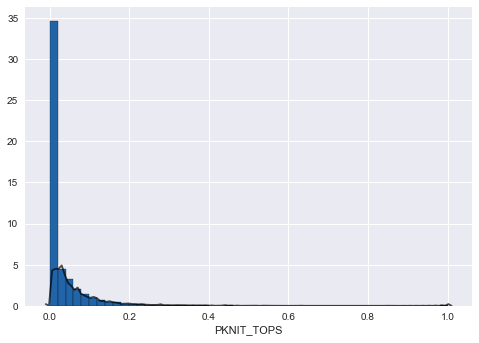

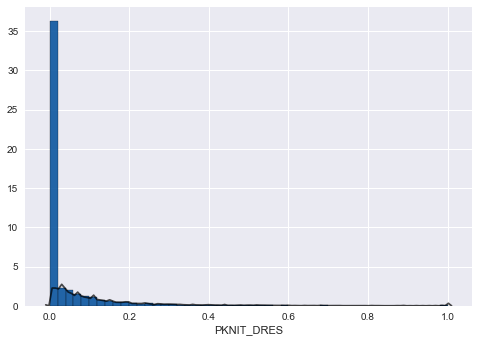

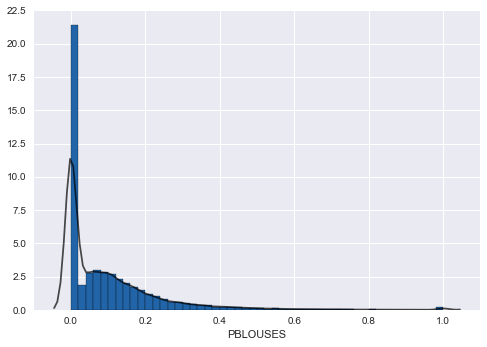

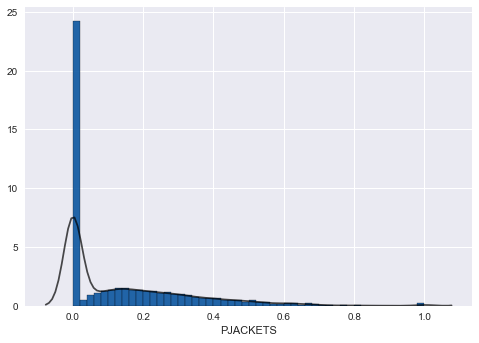

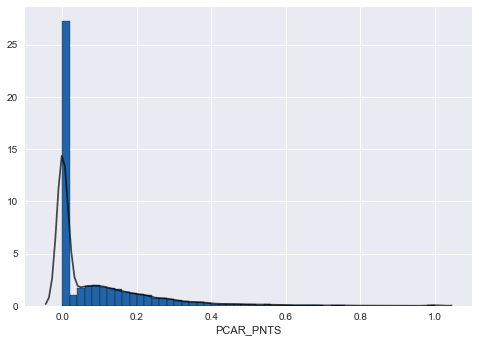

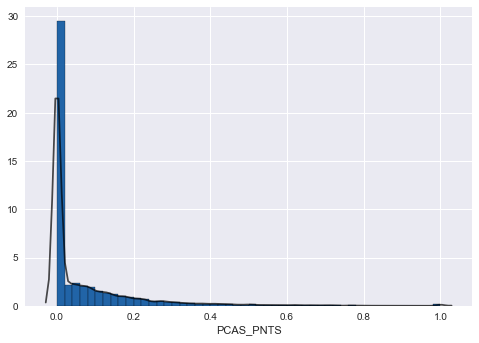

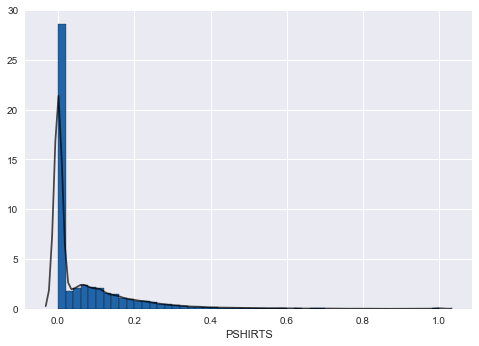

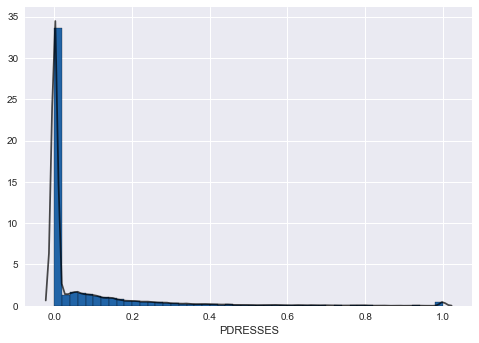

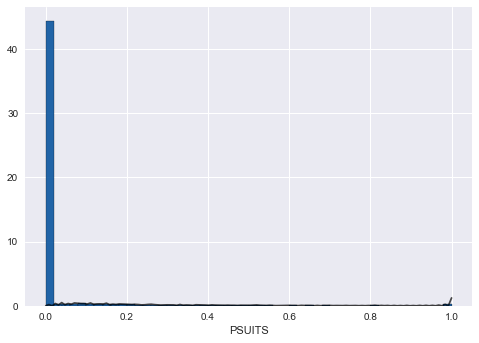

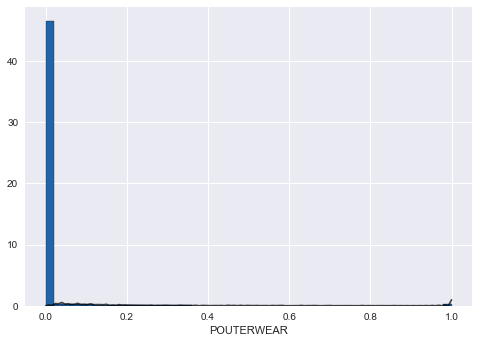

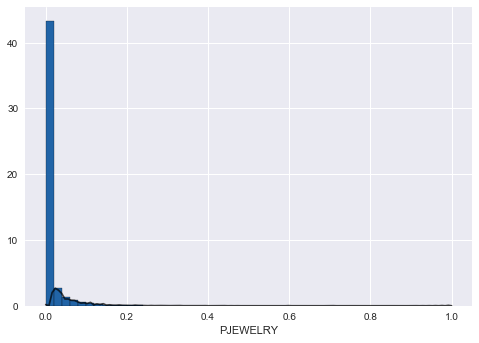

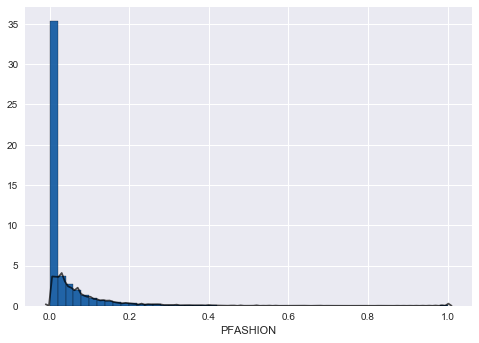

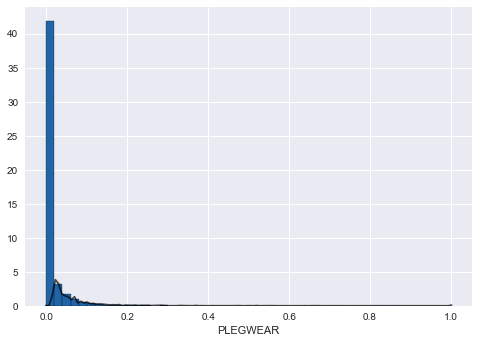

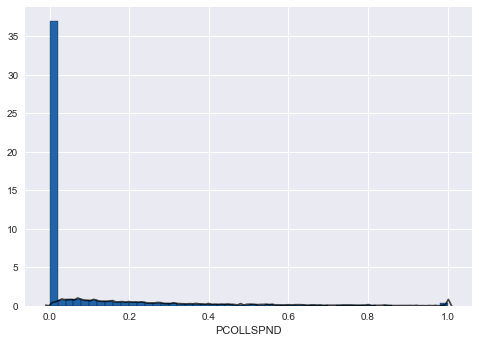

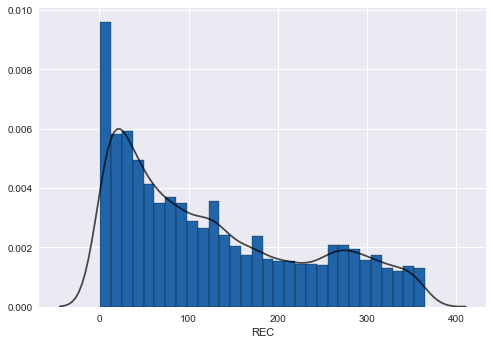

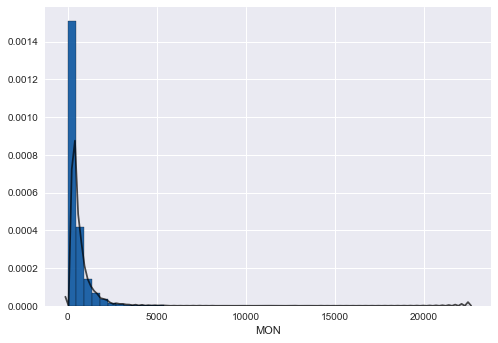

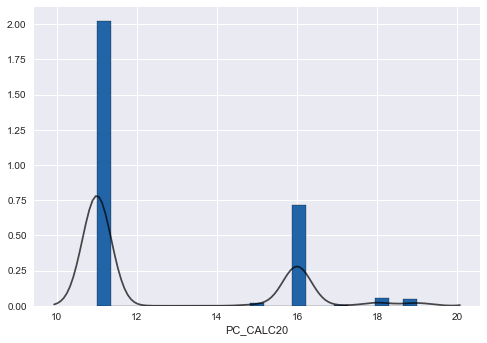

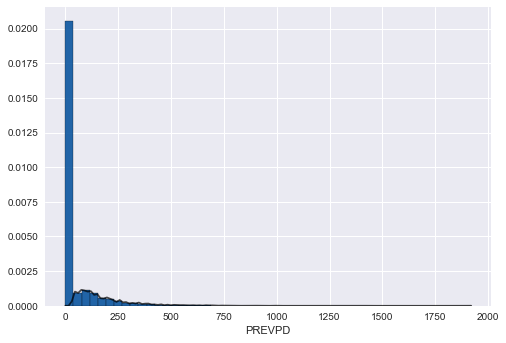

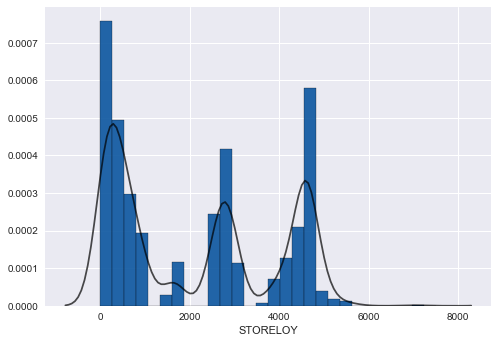

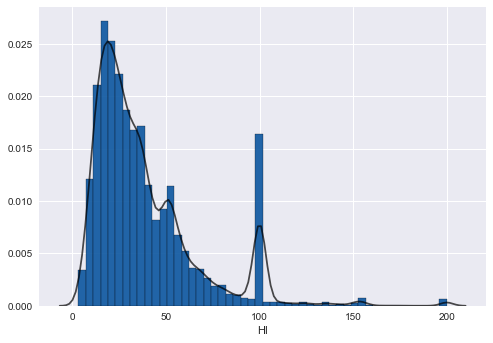

In [12]:
#check the distribution of the data
def hist(series):
    fig, ax= plt.subplots()
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.9, 'edgecolor':'black', 'color': sns.color_palette('Blues')[-1]},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    return fig, ax
for var in num_predictors:
    hist(clean_Data[var])
    sns.despine()
    plt.show()

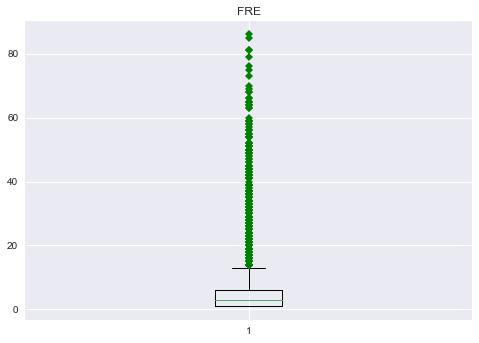

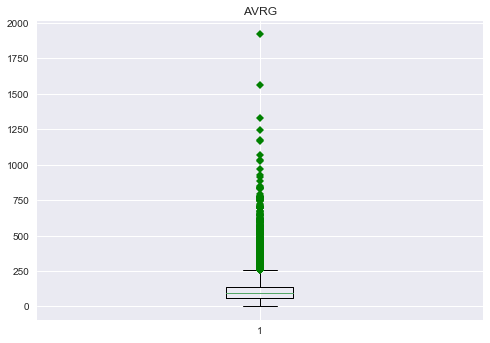

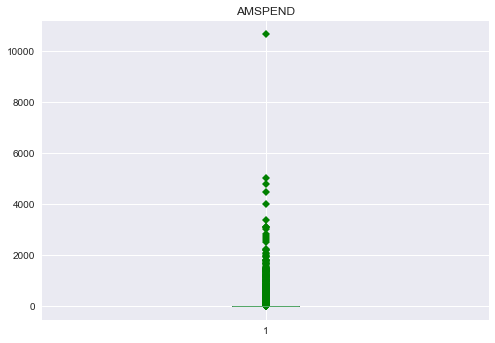

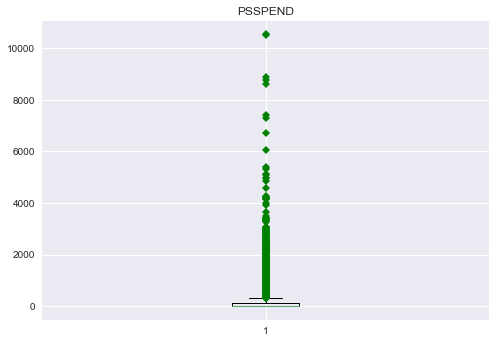

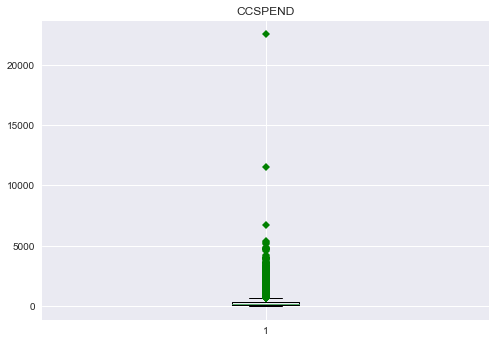

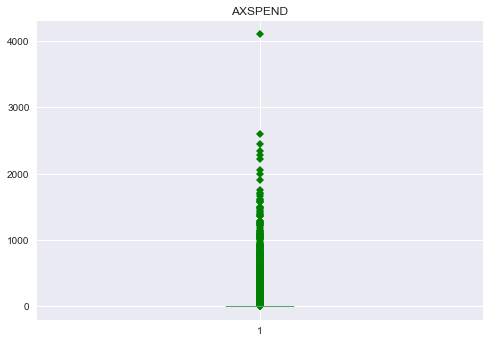

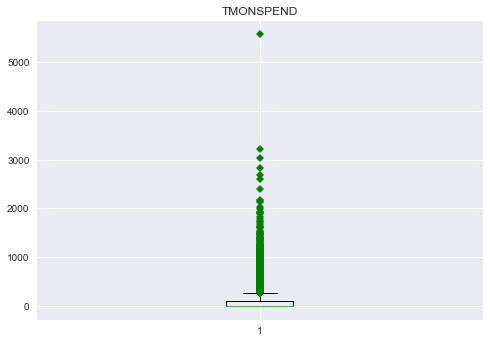

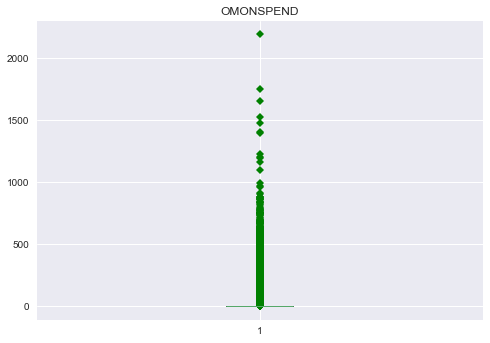

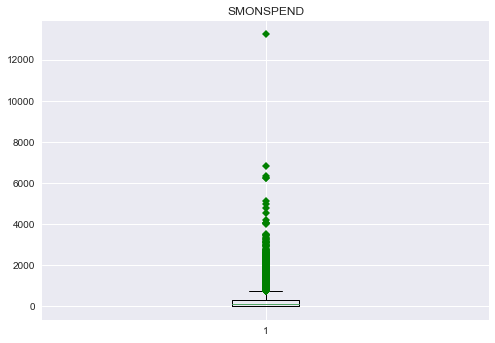

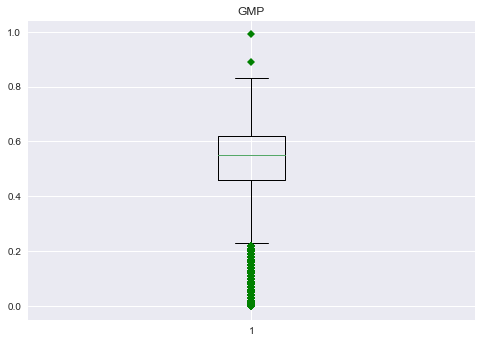

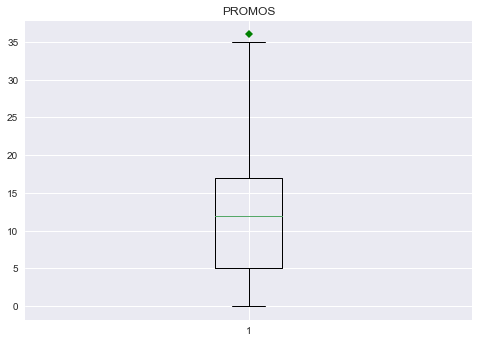

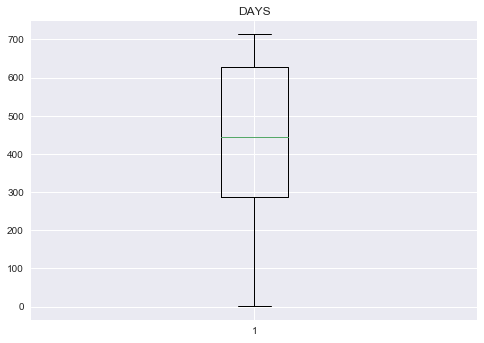

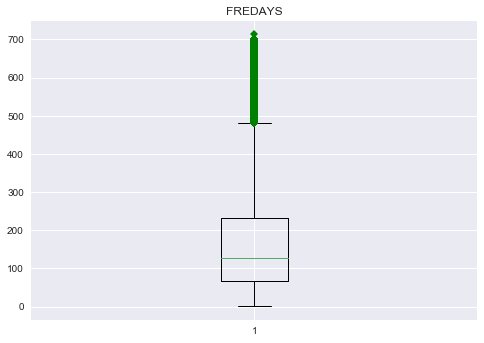

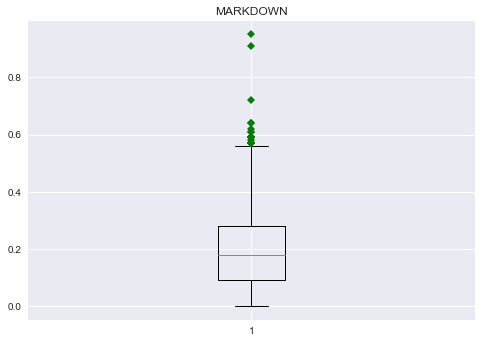

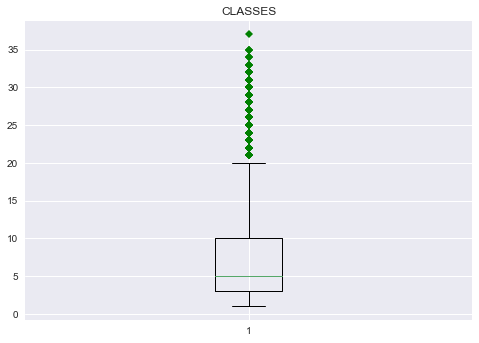

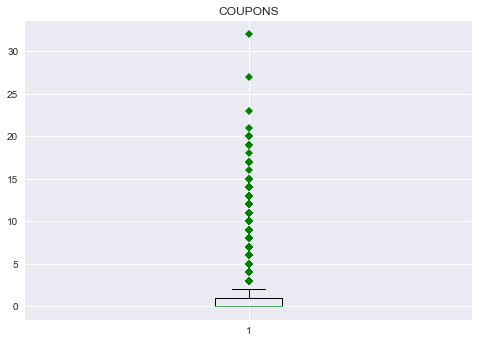

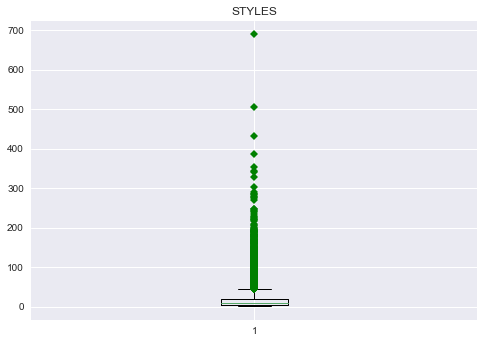

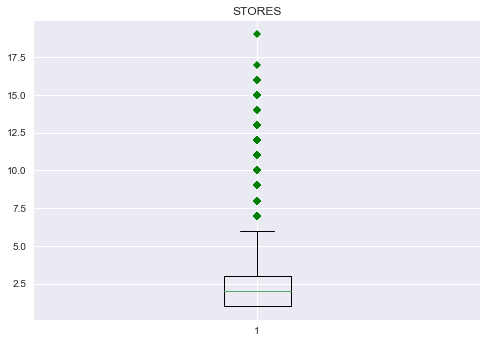

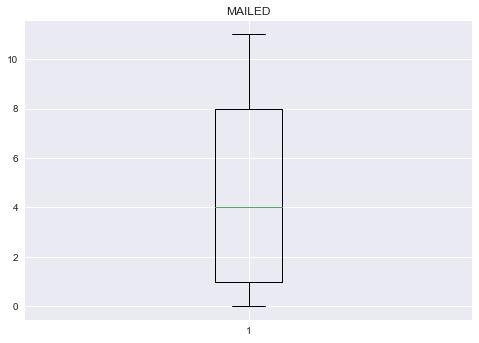

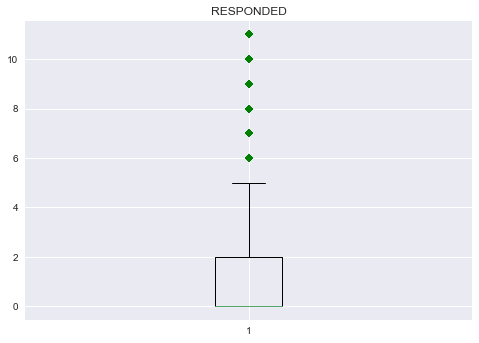

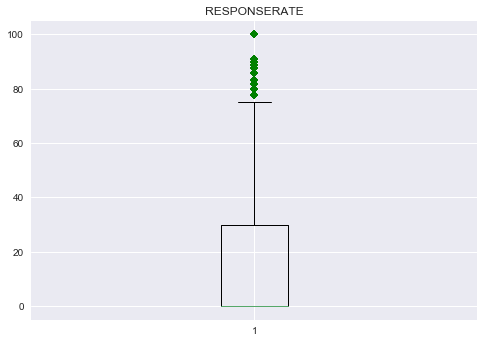

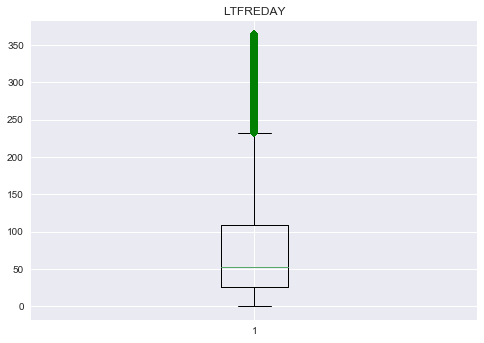

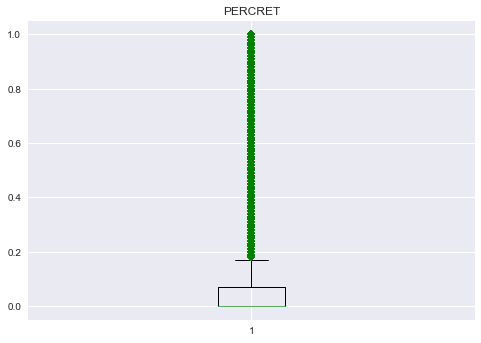

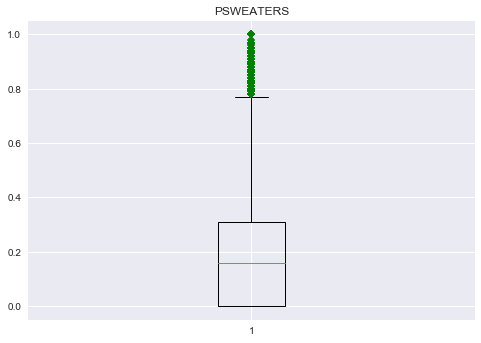

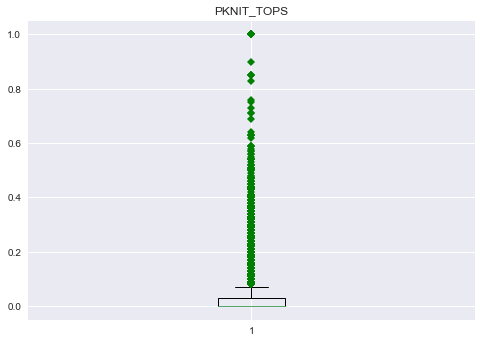

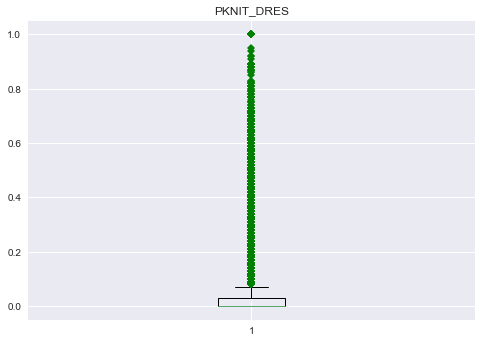

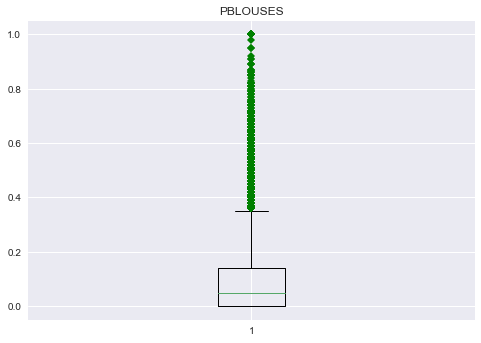

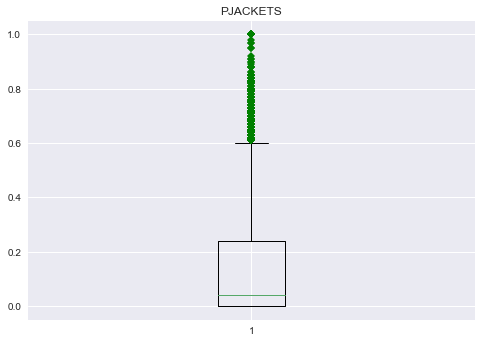

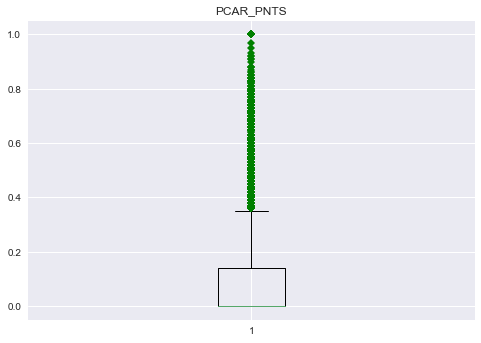

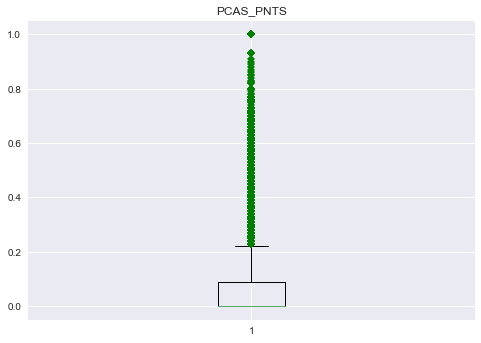

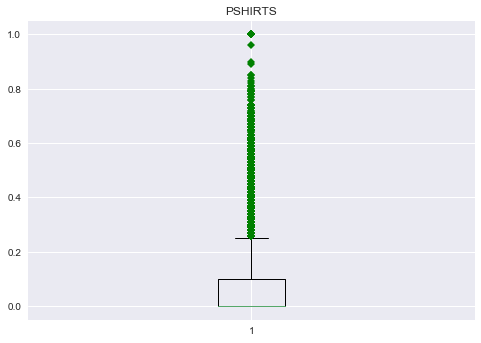

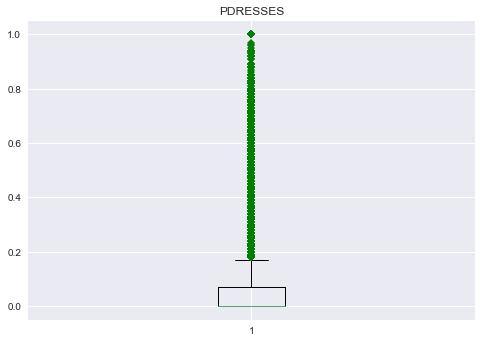

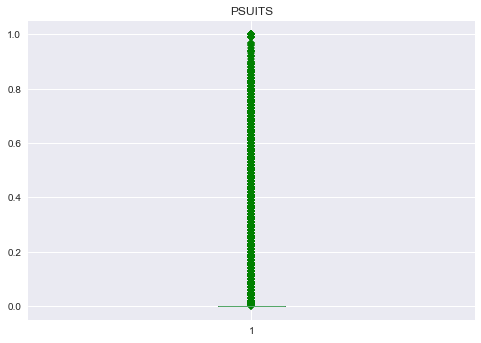

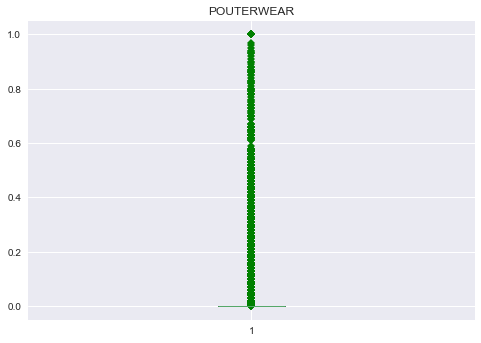

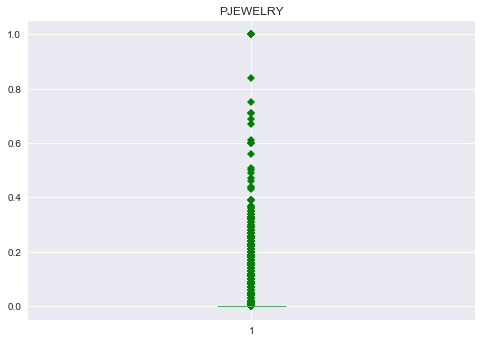

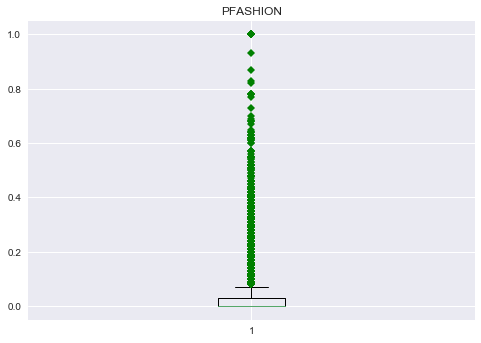

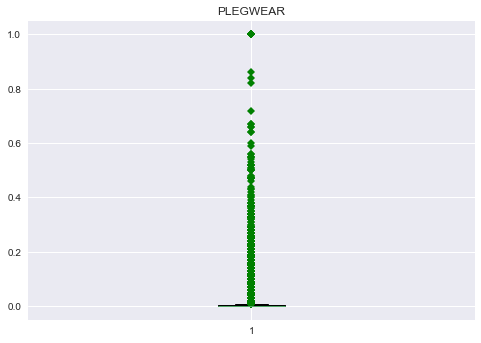

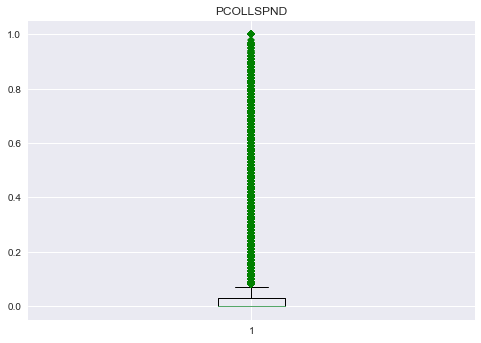

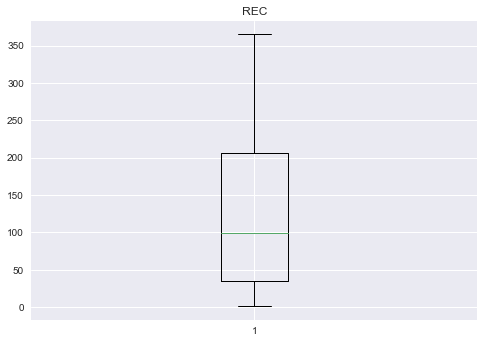

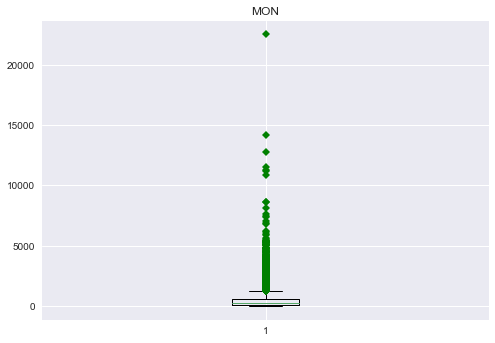

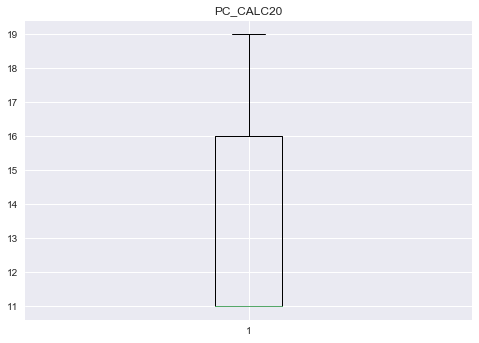

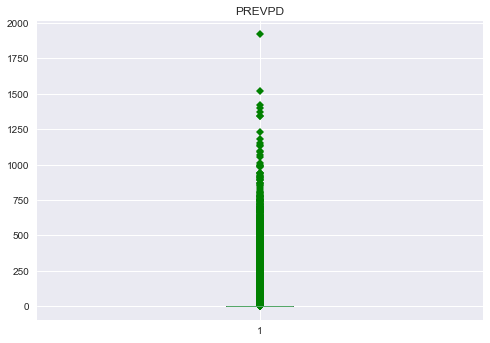

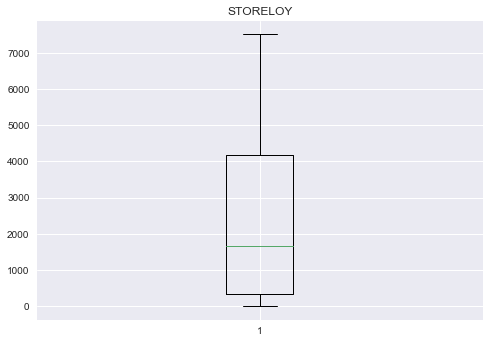

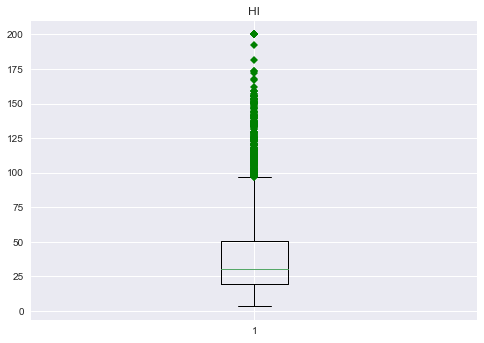

In [13]:
# function to make boxplot of all the numeric data
def make_boxplot(var):
    data = clean_Data[var]
    plt.figure()
    plt.boxplot(data, 0, 'gD')
    plt.title(var)
    plt.show()
# make boxplot to find skewness and outliners 
for var in num_predictors:
    make_boxplot(var)

##### Note: It is shown on the boxplots that most of the numerical variables have outliners. However, some of the variables have lots of extreme values because the distribution of the data itself is very skewed. To adviod excluding too much information from the data set, we only clean the outliners of the variables that are not extremely skewed.   

In [14]:
data_num_before=len(clean_Data)
# get the variables that have outliners and also not extremely skewed  
outliners_vars = ['AVRG', 'GMP','PROMOS','MARKDOWN','CLASSES','STORES']
# build a function to delete outliners
def delete_outliners(column, pre_Data):
    #calculate the IQR
    iq_range = clean_Data[column].quantile(.75)-clean_Data[column].quantile(.25)
    # the outliners has value greater than Q3+1.5*IQR or less than Q1-1.5*IQR.
    ut = clean_Data[column].quantile(.75) + 1.5*iq_range
    lt = clean_Data[column].quantile(.25) - 1.5*iq_range
    print("The outliners of "+column+" are outside of " + "(" + str(lt) + ", " + str(ut) + ")")
    clean = clean_Data.loc[(clean_Data[column] <= ut)&(clean_Data[column] >= lt)]
    return clean

for var in outliners_vars:
    clean_Data = delete_outliners(var, clean_Data)
# take a look at the clean data set
clean_Data.describe()
# reset the index
clean_Data = clean_Data.reset_index(drop=True)
print("Number of data entries left:")
print(len(clean_Data))
print("Number of data entries cleaned:")
print(data_num_before-len(clean_Data))

The outliners of AVRG are outside of (-53.43125000000001, 257.65875)
The outliners of GMP are outside of (0.195, 0.875)
The outliners of PROMOS are outside of (-13.0, 35.0)
The outliners of MARKDOWN are outside of (-0.18000000000000002, 0.54)
The outliners of CLASSES are outside of (-7.5, 20.5)
The outliners of STORES are outside of (-2.0, 6.0)
Number of data entries left:
18309
Number of data entries cleaned:
2887


### 1.5 Normalize the input data for building model (feature scaling)

In [15]:
# prepare the all the input data for modelling 
input_cols=list(clean_Data.columns)
input_cols.remove('HHKEY')
input_cols.remove('RESP')
all_inputs = clean_Data[input_cols].values

In [16]:
all_inputs

array([[208, 2, 368.46, ..., 0, 0, 0],
       [6, 4, 258.0, ..., 0, 0, 0],
       [327, 2, 77.0, ..., 0, 0, 0],
       ..., 
       [24, 9, 1274.96, ..., 0, 0, 0],
       [37, 3, 265.94, ..., 0, 0, 0],
       [21, 5, 555.42, ..., 0, 0, 0]], dtype=object)

In [17]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(all_inputs)
normalized_inputs=normalizer.transform(all_inputs)
normalized_inputs

array([[ 0.21718541,  0.00208832,  0.38473143, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00694274,  0.0046285 ,  0.298538  , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61375926,  0.00375388,  0.14452435, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.00995773,  0.00373415,  0.52898767, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0788644 ,  0.00639441,  0.56684324, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02224148,  0.00529559,  0.5882553 , ...,  0.        ,
         0.        ,  0.        ]])

In [18]:
# Extract the target class
targetClass = clean_Data[response].values.astype(int)
targetClass

array([0, 1, 0, ..., 1, 0, 1])

## 2. Exploratory Data Analysis

### 2.1 Descriptive Statistics of the numerical variables

### 2.2 Checking the balance of the y response

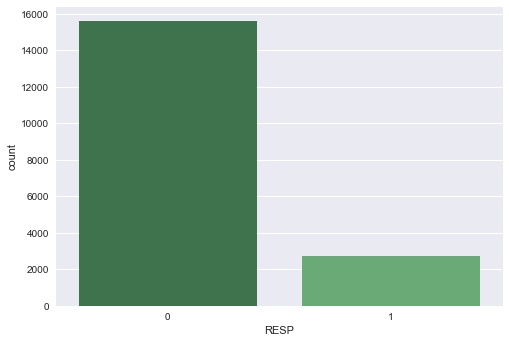

[(0, 15604), (1, 2705)]


In [32]:
from collections import Counter
#Check the distribution of the response
sns.countplot(x='RESP', data=clean_Data, palette="Greens_d")
#plt.hist(clean_Data['RESP'])
plt.show()
#plt.savefig("imbalance.png")
print(sorted(Counter(clean_Data['RESP']).items()))

### The distribution histogram shows that this is an imbalanced classification problem, thus the class_weight parameter and sampling methods will be used when building the model
According to Han, Pei and Kamber (2011), an imbalanced data set for training in classification
could lead to a biased accuracy rate of the learned model. 
Han, J., Pei, J., & Kamber, M. (2011). Data mining: concepts and techniques. Elsevier.

### 2.3 Explore the relationship between the numerical predictors and the respose, using univariate logistic regression

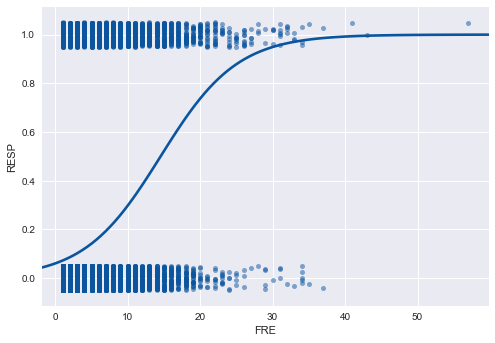

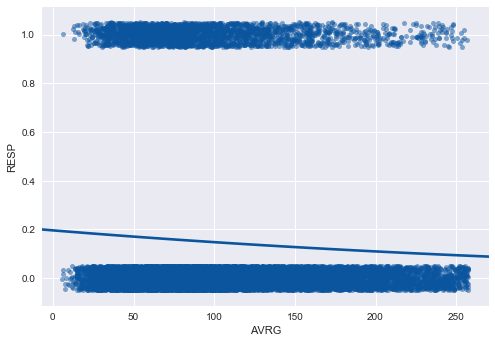

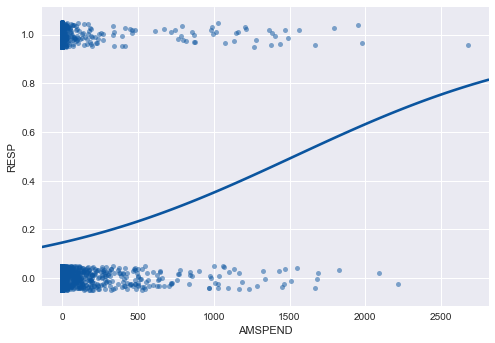

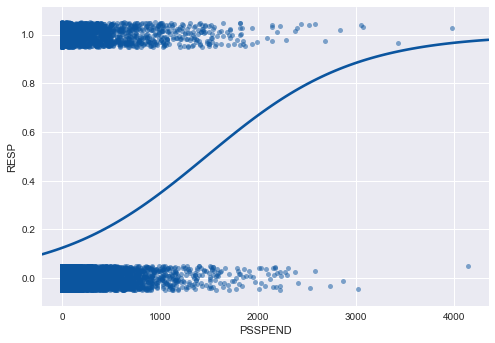

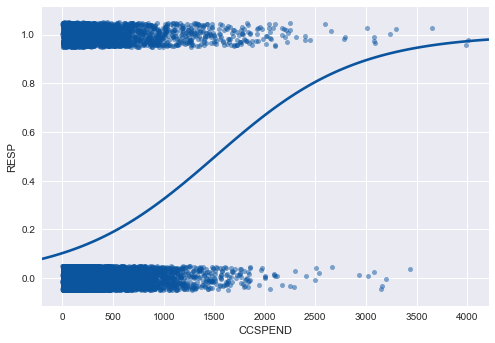

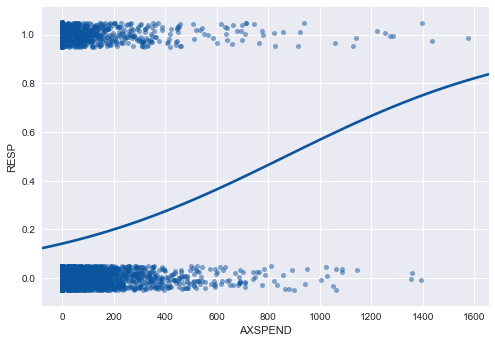

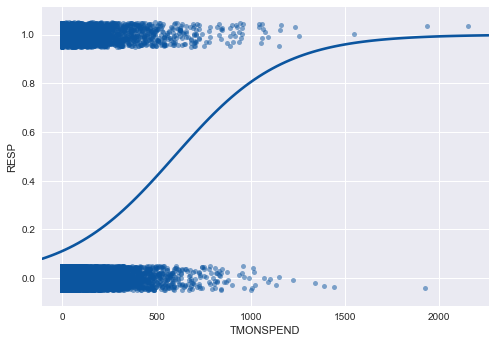

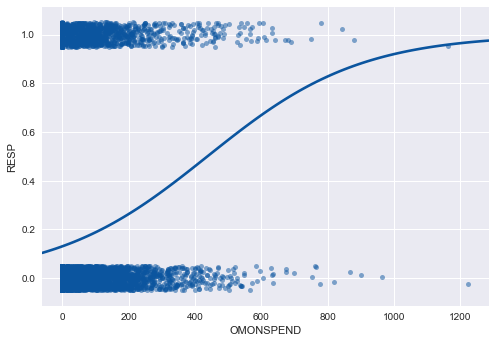

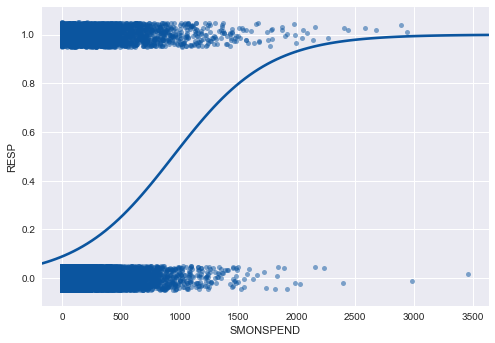

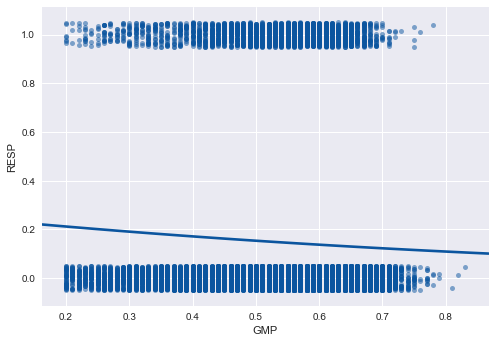

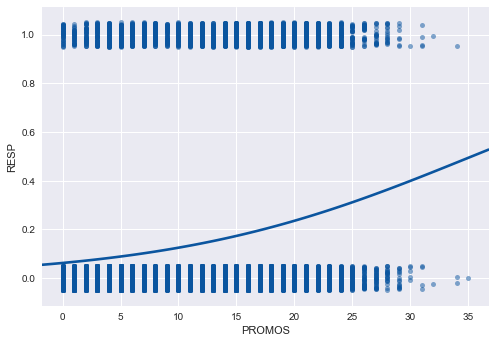

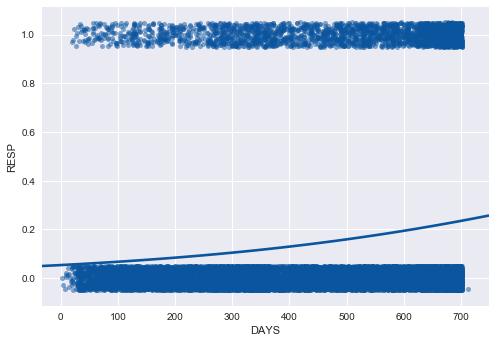

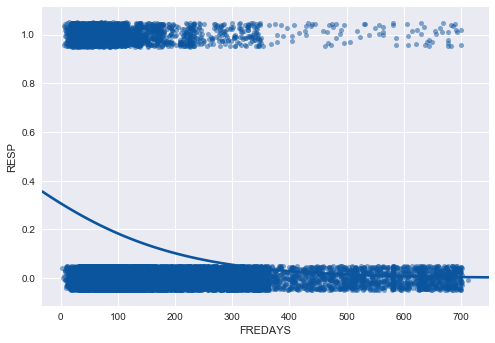

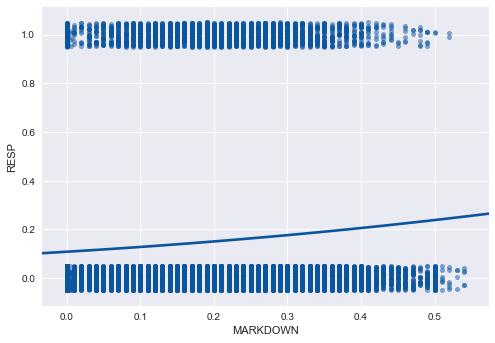

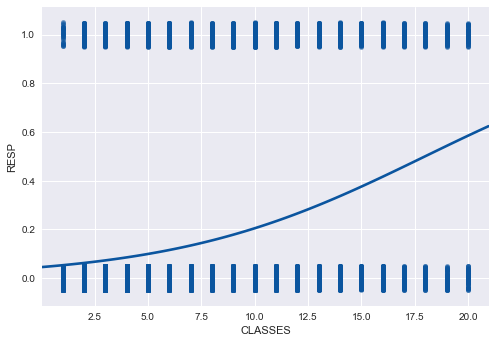

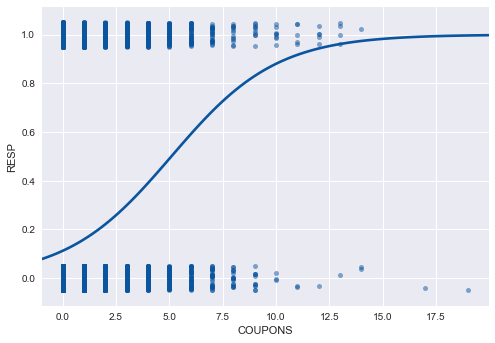

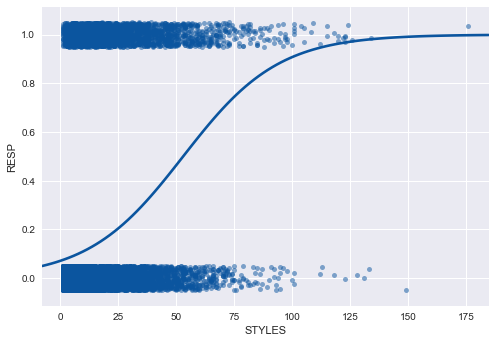

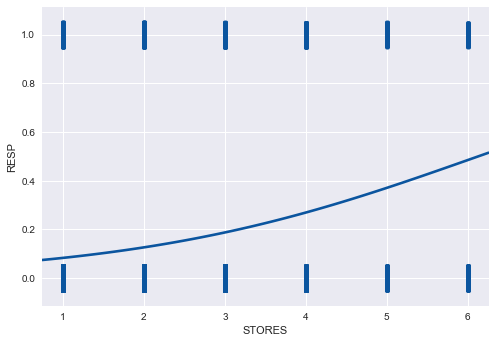

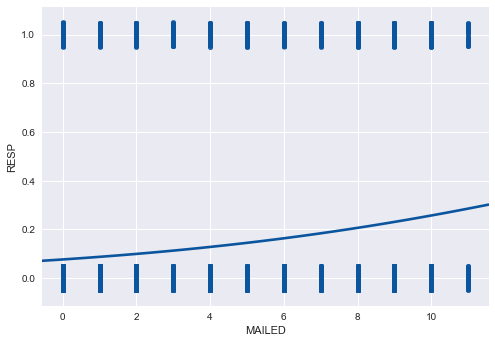

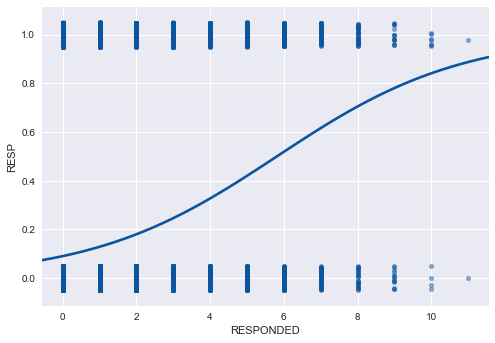

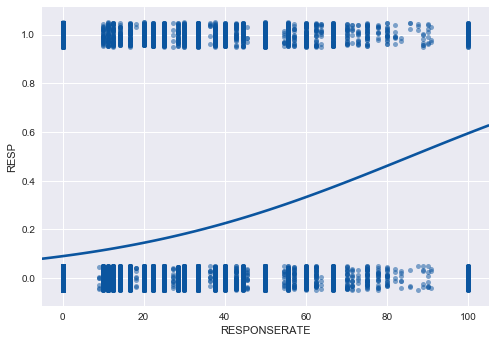

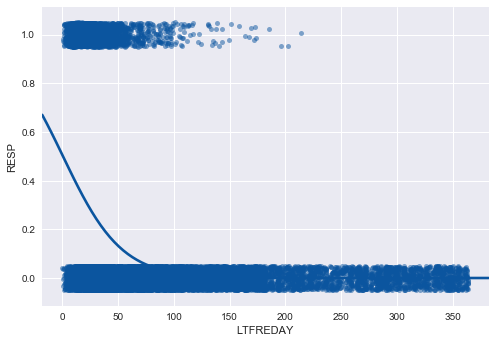

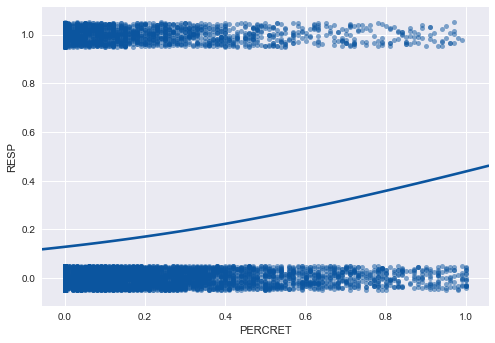

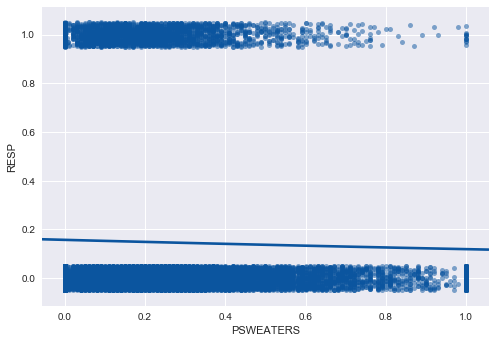

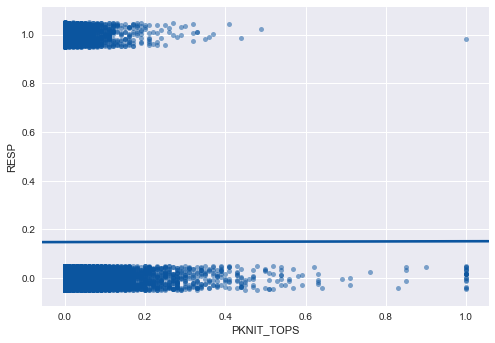

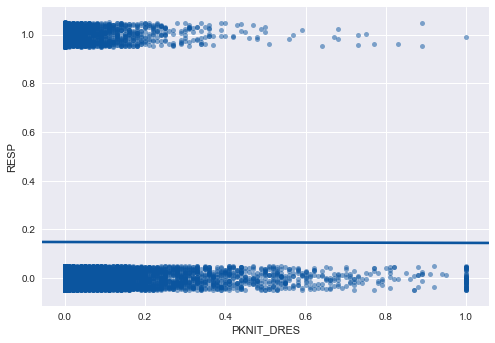

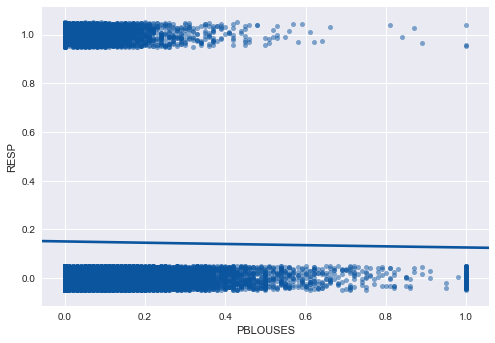

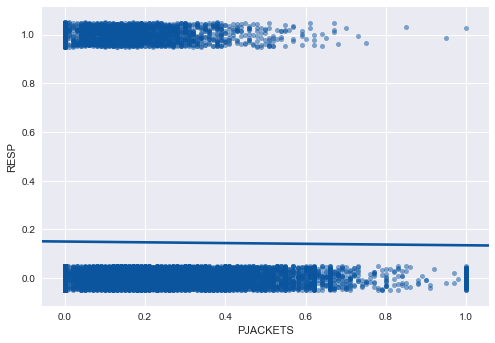

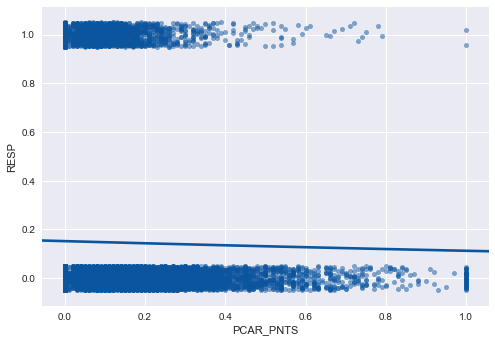

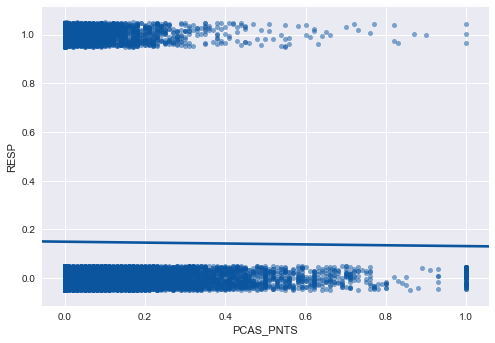

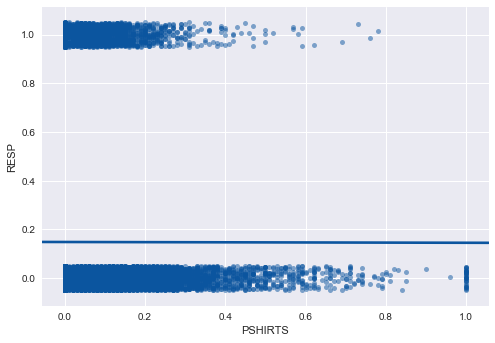

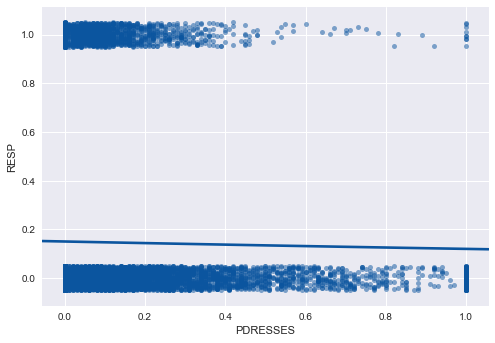

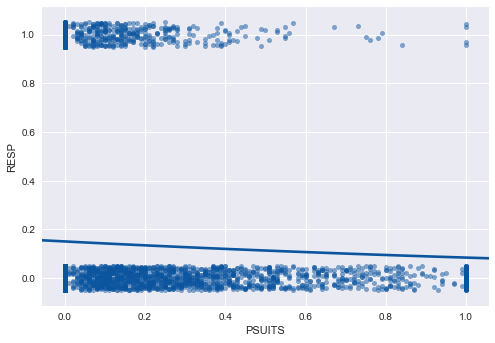

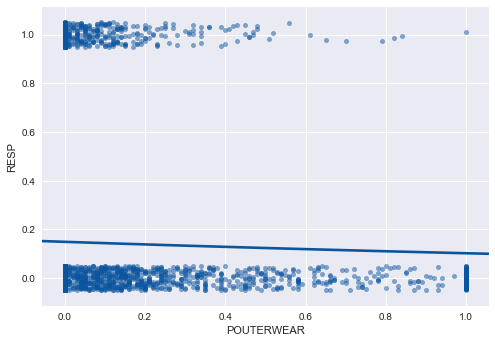

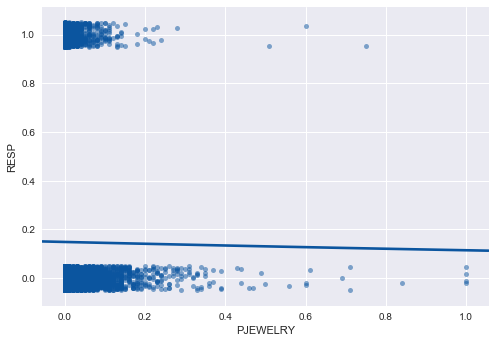

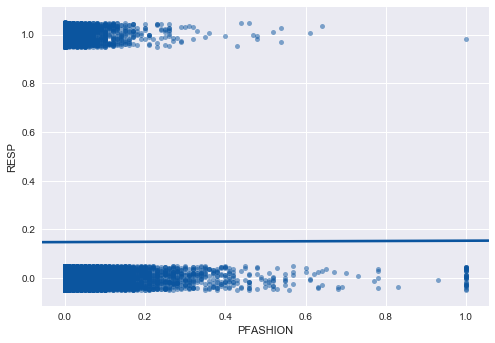

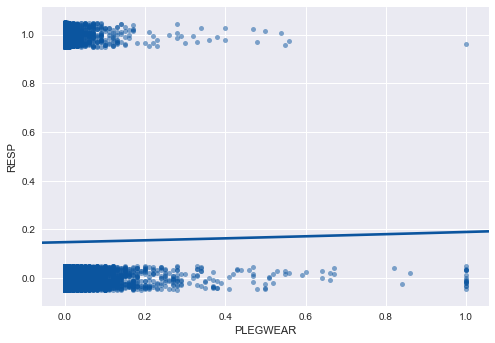

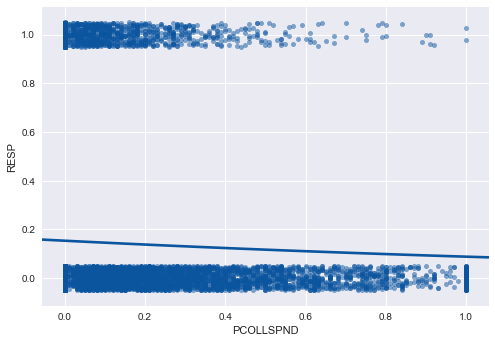

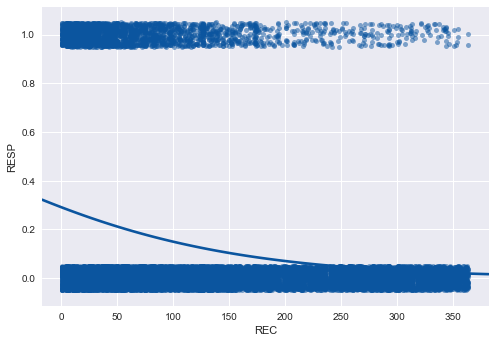

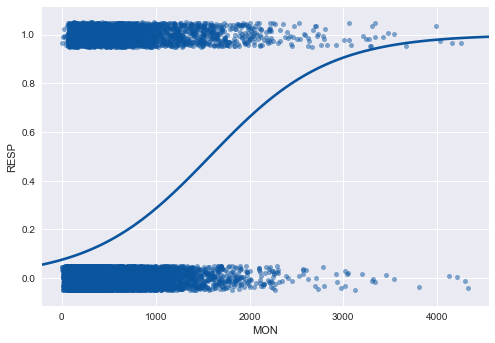

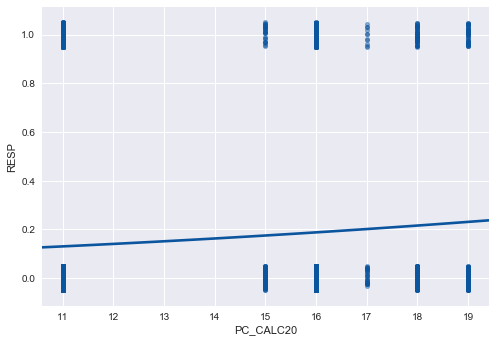

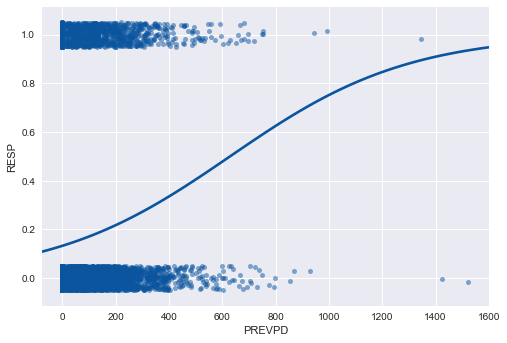

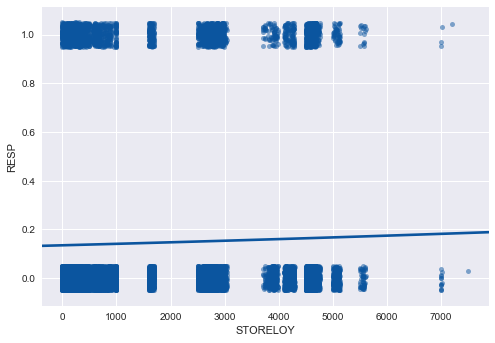

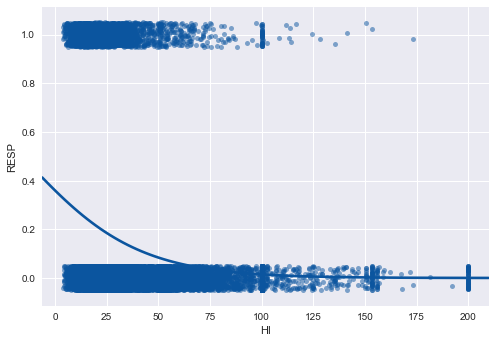

In [20]:
for i in range(len(num_predictors)):
    sns.regplot(clean_Data[num_predictors[i]], clean_Data[response], color=sns.color_palette('Blues')[-1], ci=None, logistic=True, y_jitter=0.05, 
            scatter_kws={'s': 25, 'color': sns.color_palette('Blues')[-1], 'alpha': .5})
    sns.despine()
    plt.show()

### 2.4 Explore the relationship between the categorical predictors and the respose

In [21]:
#CC_CARD
table=pd.crosstab(clean_Data['CC_CARD'], clean_Data[response])
table = (table/table.sum()).round(3)
table

RESP,0,1
CC_CARD,,
0,0.685,0.399
1,0.315,0.601


In [22]:
#VALPHON
table=pd.crosstab(clean_Data['VALPHON'], clean_Data[response])
table = (table/table.sum()).round(3)
table

RESP,0,1
VALPHON,,
0,0.156,0.063
1,0.844,0.937


In [23]:
#'WEB'
table=pd.crosstab(clean_Data['VALPHON'], clean_Data[response])
table = (table/table.sum()).round(3)
table

RESP,0,1
VALPHON,,
0,0.156,0.063
1,0.844,0.937


The result shows that there is a good correlation between Credit Card user and the response (creadict card user tends to response)

## 3. The Classification Model and Feature Selection

### 3.1 The Decision Tree  

###  Split the dataset to trainning and testing dataset

In [24]:
from sklearn.model_selection import train_test_split
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, targetClass, test_size=0.25, train_size=0.75, random_state=460349262)

### Train a simple Decision Tree Classifier: to solve the imbalanced class problem, the “balanced” mode of class_weight uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

In [25]:
#Decision Tree classification
#There are several parameters that we can tune for decision tree classifiers
#but for now let's use a basic decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# Create the classifier
decision_tree_classifier = DecisionTreeClassifier(class_weight='balanced')
# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)
# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.79838357361293144

### Use GridSearch Cross Validation to tune the parameters：
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [26]:
#Parameter tuning
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [2, 3, 4, 5, 6],
              'min_samples_split': [2, 3, 4, 5, 6],
              'criterion': ['entropy','gini'],
              'splitter': ['best','random'],
              'class_weight': ['balanced']
             }
#Specify the splitting strategy of the data set (using f1 scoring) 
sk = StratifiedKFold(n_splits=5, random_state=460349262)
grid_search = GridSearchCV(decision_tree_classifier,param_grid=parameters, cv=sk, scoring='f1')
grid_search.fit(all_inputs, targetClass)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.44614800535632393
Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 6, 'splitter': 'best'}


In [28]:
from sklearn.tree import DecisionTreeClassifier
# Use the best parameters to build the classifier
decision_tree_classifier = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=4, 
    min_samples_split=6, 
    splitter='best',
    class_weight='balanced',
    random_state=460349262)
# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=460349262, splitter='best')

### Plotting the Decision Tree 

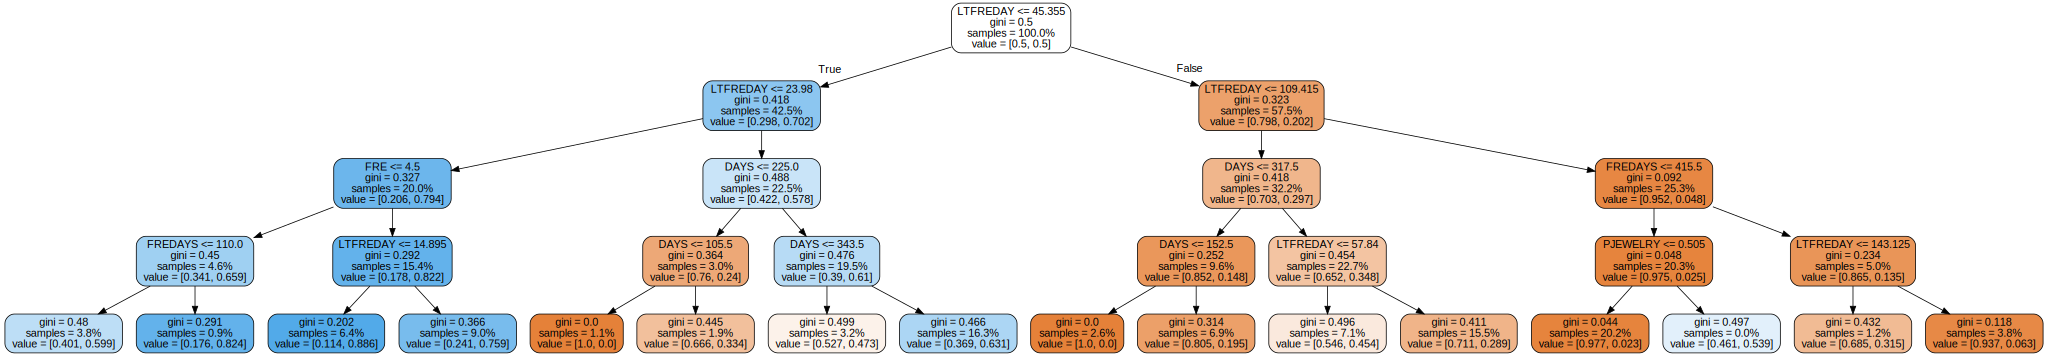

In [30]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(decision_tree_classifier, 
                           out_file=None, 
                           impurity=True, 
                           feature_names=input_cols,
                           rounded=True,
                           filled=True,
                           label='all',
                          proportion=True) 
graph = graphviz.Source(dot_data)
# uncomment if you want to save to save the tree as a pdf file
graph.render('tree')
graph

### Cross-Validation of the model 

In [31]:
#Cross-validation on Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#Specify the splitting strategy of the data set 
sk = StratifiedKFold(n_splits=20, random_state=1)

#Accuracy
dt_acc_scores = cross_val_score(decision_tree_classifier, all_inputs, targetClass, cv=sk, scoring='accuracy')
print('Accuracy scores:'+ str(dt_acc_scores))
#The mean of the Decision Tree scores
print('The mean value of the accuracy score: '+str(sum(dt_acc_scores)/20))

#Recall(Sensitivity/True Positive Rate)
dt_rec_scores = cross_val_score(decision_tree_classifier, all_inputs, targetClass, cv=sk, scoring='recall')
print('Recall(True Positive Rate) scores'+ str(dt_rec_scores))
#The mean of the Decision Tree scores
print('The mean value of the Recall score: '+str(sum(dt_rec_scores)/20))

#Precision
dt_pre_scores = cross_val_score(decision_tree_classifier, all_inputs, targetClass, cv=sk, scoring='precision')
print('Precision scores:'+ str(dt_pre_scores))
#The mean of the Decision Tree scores
print('The mean value of the Precision score: '+str(sum(dt_pre_scores)/20))

# F1-Score
dt_f1_scores = cross_val_score(decision_tree_classifier, all_inputs, targetClass, cv=sk, scoring='f1')
print('The distribution of prediction f1 score of the DecisionTree Classifer: '+ str(dt_f1_scores))
#The mean of the Decision Tree scores
print('The mean value of the f1 score: '+str(sum(dt_f1_scores)/20))

Accuracy scores:[ 0.7219193   0.73173391  0.73173391  0.63904035  0.69432314  0.69508197
  0.68743169  0.71256831  0.71147541  0.64043716  0.66120219  0.67759563
  0.71912568  0.73551913  0.64699454  0.71912568  0.6863388   0.76502732
  0.65027322  0.6557377 ]
The mean value of the accuracy score: 0.694134252563
Recall(True Positive Rate) scores[ 0.81617647  0.82352941  0.77941176  0.88970588  0.83088235  0.82962963
  0.83703704  0.77037037  0.81481481  0.83703704  0.87407407  0.76296296
  0.81481481  0.74074074  0.82962963  0.80740741  0.82222222  0.68888889
  0.85185185  0.94074074]
The mean value of the Recall score: 0.818096405229
Precision scores:[ 0.3255132   0.33532934  0.32919255  0.27688787  0.30540541  0.30434783
  0.29973475  0.30952381  0.31518625  0.26904762  0.28710462  0.28142077
  0.32163743  0.3257329   0.27184466  0.32058824  0.29679144  0.34962406
  0.27710843  0.29262673]
The mean value of the Precision score: 0.304732394294
The distribution of prediction f1 score o

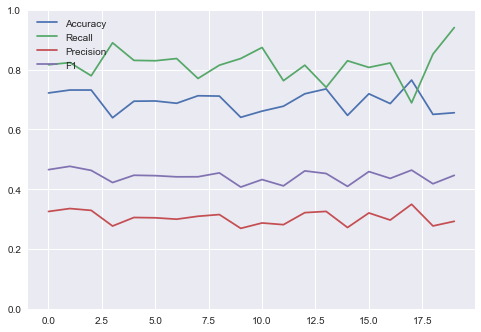

In [33]:
plt.plot(dt_acc_scores)
plt.plot(dt_rec_scores)
plt.plot(dt_pre_scores)
plt.plot(dt_f1_scores)
plt.ylim((0,1))
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1'], loc='upper left')
plt.show()

The model has a high Recall but Low Precision score, this might be due to the fact that the model is not learning enough about the minority class and tends to predict the majority class. To further tackle the problem of imbalance data set, an ensemble model is built with the under-sampling methods

### Solving the imbalance data set problem1: ensemble model of Decision Tree classifiers with Under-Sampling data set

http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.ensemble.BalancedBaggingClassifier.html
BalancedBaggingClassifier allows to resample each subset of data before to train each estimator of the ensemble. In short, it combines the output of an EasyEnsemble sampler with an ensemble of classifiers (i.e. BaggingClassifier). Therefore, BalancedBaggingClassifier takes the same parameters than the scikit-learn BaggingClassifier. Additionally, there is two additional parameters, ratio and replacement, as in the EasyEnsemble sampler:

In [160]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.ensemble import BalancedBaggingClassifier
bbc_dt = BalancedBaggingClassifier(base_estimator=decision_tree_classifier,  
                                ratio='auto',
                                replacement=True,
                                random_state=460349262)
bbc_dt.fit(training_inputs, training_classes)
y_pred_dt = bbc_dt.predict(testing_inputs)
#accuracy
accuracy_dt=accuracy_score(testing_classes, y_pred_dt)
print('Accuracy : ', accuracy_dt)
#f1
f1_dt=f1_score(testing_classes, y_pred_dt)
print('F1-score : ', f1_dt)    

Accuracy :  0.704019222368
F1-score :  0.449857896874


In [161]:
#Cross-validation on Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#Specify the splitting strategy of the data set 
sk = StratifiedKFold(n_splits=20, random_state=1)

#Accuracy
bccdt_acc_scores = cross_val_score(bbc_dt, all_inputs, targetClass, cv=sk, scoring='accuracy')
print('Accuracy scores:'+ str(bccdt_acc_scores))
#The mean of the Decision Tree scores
print('The mean value of the accuracy score: '+str(sum(bccdt_acc_scores)/20))

#Recall(Sensitivity/True Positive Rate)
bccdt_rec_scores = cross_val_score(bbc_dt, all_inputs, targetClass, cv=sk, scoring='recall')
print('Recall(True Positive Rate) scores'+ str(bccdt_rec_scores))
#The mean of the Decision Tree scores
print('The mean value of the Recall score: '+str(sum(bccdt_rec_scores)/20))

#Precision
bccdt_pre_scores = cross_val_score(bbc_dt, all_inputs, targetClass, cv=sk, scoring='precision')
print('Precision scores:'+ str(bccdt_pre_scores))
#The mean of the Decision Tree scores
print('The mean value of the Precision score: '+str(sum(bccdt_pre_scores)/20))

# F1-Score
bccdt_f1_scores = cross_val_score(bbc_dt, all_inputs, targetClass, cv=sk, scoring='f1')
print('The distribution of prediction f1 score of the DecisionTree Classifer: '+ str(bccdt_f1_scores))
#The mean of the Decision Tree scores
print('The mean value of the f1 score: '+str(sum(bccdt_f1_scores)/20))

Accuracy scores:[ 0.64667394  0.6782988   0.67175573  0.67611778  0.70960699  0.70054645
  0.73005464  0.68415301  0.67322404  0.67322404  0.70382514  0.66229508
  0.70054645  0.70273224  0.64808743  0.66994536  0.75737705  0.73224044
  0.70163934  0.71256831]
The mean value of the accuracy score: 0.691745612051
Recall(True Positive Rate) scores[ 0.90441176  0.88235294  0.83823529  0.86029412  0.76470588  0.83703704
  0.81481481  0.85925926  0.8962963   0.81481481  0.82962963  0.84444444
  0.9037037   0.82222222  0.82962963  0.85185185  0.78518519  0.78518519
  0.82222222  0.92592593]
The mean value of the Recall score: 0.843611111111
Precision scores:[ 0.28341014  0.30075188  0.29007634  0.29620253  0.30769231  0.30958904
  0.3313253   0.30051813  0.29802956  0.28645833  0.31111111  0.28358209
  0.31853786  0.3091922   0.27250608  0.28967254  0.35451505  0.32919255
  0.30833333  0.33068783]
The mean value of the Precision score: 0.305569210398
The distribution of prediction f1 score o

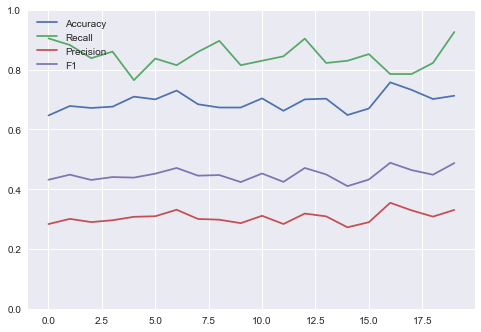

In [189]:
plt.plot(bccdt_acc_scores)
plt.plot(bccdt_rec_scores)
plt.plot(bccdt_pre_scores)
plt.plot(bccdt_f1_scores)
plt.ylim((0,1))
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1'], loc='upper left')
plt.show()

The under-sampling method has similar result as tunning the class weight

### Solving the imbalance data set problem2: the Over-Sampling method
More information about the algorithms use to generate new samples:
http://contrib.scikit-learn.org/imbalanced-learn/stable/over_sampling.html#a-practical-guide

### Generate new samples with random sampling

In [196]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(all_inputs, targetClass)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

#split the over-sample data set
from sklearn.model_selection import train_test_split
(over_training_inputs,
 over_testing_inputs,
 over_training_classes,
 over_testing_classes) = train_test_split(X_resampled, y_resampled, test_size=0.25, train_size=0.75, random_state=460349262)
from sklearn.tree import DecisionTreeClassifier

[(0, 15604), (1, 15604)]


In [201]:
# Use the best parameters to build the classifier
decision_tree_classifier = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=4, 
    min_samples_split=2, 
    splitter='best',
    class_weight='balanced',
    random_state=460349262)
# Train the classifier on the training set
decision_tree_classifier.fit(over_training_inputs, over_training_classes)
#get the predictiong result of the testing data
over_pred=decision_tree_classifier.predict(over_training_inputs)
over_gold=over_testing_classes

In [198]:
#Cross-validation on Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#Specify the splitting strategy of the data set 
sk = StratifiedKFold(n_splits=20, random_state=1)

#Accuracy
over_dt_acc_scores = cross_val_score(decision_tree_classifier, X_resampled, y_resampled, cv=sk, scoring='accuracy')
print('Accuracy scores:'+ str(over_dt_acc_scores))
#The mean of the Decision Tree scores
print('The mean value of the accuracy score: '+str(sum(over_dt_acc_scores)/20))

#Recall(Sensitivity/True Positive Rate)
over_dt_rec_scores = cross_val_score(decision_tree_classifier, X_resampled, y_resampled, cv=sk, scoring='recall')
print('Recall(True Positive Rate) scores'+ str(over_dt_rec_scores))
#The mean of the Decision Tree scores
print('The mean value of the Recall score: '+str(sum(over_dt_rec_scores)/20))

#Precision
over_dt_pre_scores = cross_val_score(decision_tree_classifier, X_resampled, y_resampled, cv=sk, scoring='precision')
print('Precision scores:'+ str(over_dt_pre_scores))
#The mean of the Decision Tree scores
print('The mean value of the Precision score: '+str(sum(over_dt_pre_scores)/20))

# F1-Score
over_dt_f1_scores = cross_val_score(decision_tree_classifier, X_resampled, y_resampled, cv=sk, scoring='f1')
print('The distribution of prediction f1 score of the DecisionTree Classifer: '+ str(over_dt_f1_scores))
#The mean of the Decision Tree scores
print('The mean value of the f1 score: '+str(sum(over_dt_f1_scores)/20))

Accuracy scores:[ 0.7362356   0.73815621  0.74327785  0.72791293  0.77435897  0.74935897
  0.76089744  0.72371795  0.72820513  0.74615385  0.76730769  0.70961538
  0.77435897  0.77115385  0.72564103  0.7474359   0.78717949  0.77051282
  0.74807692  0.74423077]
The mean value of the accuracy score: 0.748689385732
Recall(True Positive Rate) scores[ 0.88732394  0.76440461  0.76056338  0.76696543  0.87564103  0.84230769
  0.73974359  0.82179487  0.76923077  0.77435897  0.77692308  0.75641026
  0.7974359   0.80897436  0.7974359   0.77948718  0.77820513  0.75128205
  0.77051282  0.77307692]
The mean value of the Recall score: 0.789603893759
Precision scores:[ 0.68141593  0.72627737  0.73514851  0.71140143  0.72814499  0.71027027
  0.77242303  0.68703108  0.71090047  0.73300971  0.76226415  0.69167644
  0.7622549   0.75208582  0.69730942  0.73253012  0.7924282   0.78133333
  0.73742331  0.73090909]
The mean value of the Precision score: 0.731811878514
The distribution of prediction f1 score o

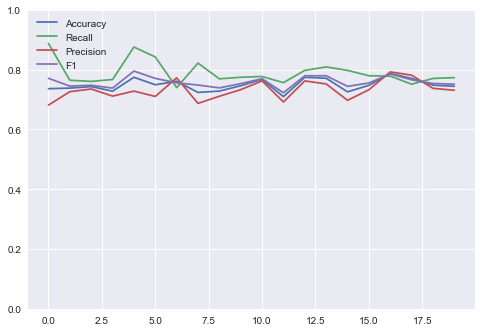

In [200]:
plt.plot(over_dt_acc_scores)
plt.plot(over_dt_rec_scores)
plt.plot(over_dt_pre_scores)
plt.plot(over_dt_f1_scores)
plt.ylim((0,1))
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1'], loc='upper left')
plt.show()

### Generate new samples with Synthetic Minority Oversampling Technique (SMOTE) 
http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.over_sampling.SMOTE.html

In [206]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE(random_state=460349262).fit_sample(all_inputs, targetClass)
print(sorted(Counter(y_resampled).items()))
#split the over-sample data set
from sklearn.model_selection import train_test_split
(over_training_inputs,
 over_testing_inputs,
 over_training_classes,
 over_testing_classes) = train_test_split(X_resampled, y_resampled, test_size=0.25, train_size=0.75, random_state=460349262)

[(0, 15604), (1, 15604)]


In [208]:
# Use the best parameters to build the classifier
decision_tree_classifier = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=4, 
    min_samples_split=2, 
    splitter='best',
    class_weight='balanced',
    random_state=460349262)
# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)
#get the predictiong result of the testing data
over_pred_SMOTE=decision_tree_classifier.predict(over_training_inputs)
over_gold_SMOTE=over_testing_classes

In [209]:
#Cross-validation on Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#Specify the splitting strategy of the data set 
sk = StratifiedKFold(n_splits=20, random_state=1)

#Accuracy
overSMOTE_dt_acc_scores = cross_val_score(decision_tree_classifier, X_resampled, y_resampled, cv=sk, scoring='accuracy')
print('Accuracy scores:'+ str(overSMOTE_dt_acc_scores))
#The mean of the Decision Tree scores
print('The mean value of the accuracy score: '+str(sum(overSMOTE_dt_acc_scores)/20))

#Recall(Sensitivity/True Positive Rate)
overSMOTE_dt_rec_scores = cross_val_score(decision_tree_classifier, X_resampled, y_resampled, cv=sk, scoring='recall')
print('Recall(True Positive Rate) scores'+ str(overSMOTE_dt_rec_scores))
#The mean of the Decision Tree scores
print('The mean value of the Recall score: '+str(sum(overSMOTE_dt_rec_scores)/20))

#Precision
overSMOTE_dt_pre_scores = cross_val_score(decision_tree_classifier, X_resampled, y_resampled, cv=sk, scoring='precision')
print('Precision scores:'+ str(overSMOTE_dt_pre_scores))
#The mean of the Decision Tree scores
print('The mean value of the Precision score: '+str(sum(overSMOTE_dt_pre_scores)/20))

# F1-Score
overSMOTE_dt_f1_scores = cross_val_score(decision_tree_classifier, X_resampled, y_resampled, cv=sk, scoring='f1')
print('The distribution of prediction f1 score of the DecisionTree Classifer: '+ str(overSMOTE_dt_f1_scores))
#The mean of the Decision Tree scores
print('The mean value of the f1 score: '+str(sum(overSMOTE_dt_f1_scores)/20))

Accuracy scores:[ 0.50960307  0.66901408  0.58962868  0.65556978  0.7974359   0.8275641
  0.76346154  0.71538462  0.78397436  0.77371795  0.81025641  0.7775641
  0.80961538  0.80641026  0.76923077  0.74423077  0.87435897  0.7775641
  0.80833333  0.77371795]
The mean value of the accuracy score: 0.751831806691
Recall(True Positive Rate) scores[ 0.22279129  0.52496799  0.36107554  0.69270166  0.82179487  0.82307692
  0.84871795  0.80897436  0.81794872  0.87564103  0.82692308  0.80769231
  0.85        0.81538462  0.87307692  0.83333333  0.85        0.82435897
  0.83974359  0.85641026]
The mean value of the Recall score: 0.758730670738
Precision scores:[ 0.52252252  0.73741007  0.66509434  0.64481526  0.78361858  0.8305304
  0.72508215  0.68142549  0.76590636  0.72736954  0.80024814  0.7617896
  0.78647687  0.80100756  0.72292994  0.70729053  0.893531    0.75381008
  0.79010856  0.73487349]
The mean value of the Precision score: 0.741792023815
The distribution of prediction f1 score of the

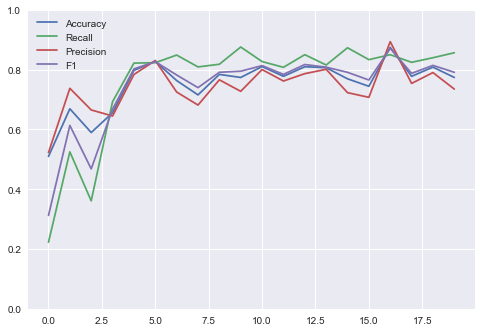

In [210]:
plt.plot(overSMOTE_dt_acc_scores)
plt.plot(overSMOTE_dt_rec_scores)
plt.plot(overSMOTE_dt_pre_scores)
plt.plot(overSMOTE_dt_f1_scores)
plt.ylim((0,1))
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1'], loc='upper left')
plt.show()

### Generate new samples with Adaptive Synthetic Sampling Method (ADASYN)
http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.over_sampling.ADASYN.html

In [212]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = ADASYN(random_state=460349262).fit_sample(all_inputs, targetClass)
#split the over-sample data set
from sklearn.model_selection import train_test_split
(over_training_inputs,
 over_testing_inputs,
 over_training_classes,
 over_testing_classes) = train_test_split(X_resampled, y_resampled, test_size=0.25, train_size=0.75, random_state=460349262)

In [213]:
# Use the best parameters to build the classifier
decision_tree_classifier = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=4, 
    min_samples_split=2, 
    splitter='best',
    class_weight='balanced',
    random_state=460349262)
# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)
#get the predictiong result of the testing data
over_pred_ADASYN=decision_tree_classifier.predict(over_training_inputs)
over_gold_ADASYN=over_testing_classes

In [215]:
#Cross-validation on Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#Specify the splitting strategy of the data set 
sk = StratifiedKFold(n_splits=20, random_state=1)

#Accuracy
overADASYN_dt_acc_scores = cross_val_score(decision_tree_classifier, X_resampled, y_resampled, cv=sk, scoring='accuracy')
print('Accuracy scores:'+ str(overADASYN_dt_acc_scores))
#The mean of the Decision Tree scores
print('The mean value of the accuracy score: '+str(sum(overADASYN_dt_acc_scores)/20))

#Recall(Sensitivity/True Positive Rate)
overADASYN_dt_rec_scores = cross_val_score(decision_tree_classifier, X_resampled, y_resampled, cv=sk, scoring='recall')
print('Recall(True Positive Rate) scores'+ str(overADASYN_dt_rec_scores))
#The mean of the Decision Tree scores
print('The mean value of the Recall score: '+str(sum(overADASYN_dt_rec_scores)/20))

#Precision
overADASYN_dt_pre_scores = cross_val_score(decision_tree_classifier, X_resampled, y_resampled, cv=sk, scoring='precision')
print('Precision scores:'+ str(overADASYN_dt_pre_scores))
#The mean of the Decision Tree scores
print('The mean value of the Precision score: '+str(sum(overADASYN_dt_pre_scores)/20))

# F1-Score
overADASYN_dt_f1_scores = cross_val_score(decision_tree_classifier, X_resampled, y_resampled, cv=sk, scoring='f1')
print('The distribution of prediction f1 score of the DecisionTree Classifer: '+ str(overADASYN_dt_f1_scores))
#The mean of the Decision Tree scores
print('The mean value of the f1 score: '+str(sum(overADASYN_dt_f1_scores)/20))

Accuracy scores:[ 0.40477728  0.19238218  0.38411879  0.64686895  0.75775194  0.87596899
  0.95671835  0.98514212  0.96382429  0.97286822  0.99612403  0.97997416
  0.99418229  0.99676794  0.9638009   0.99612153  0.99935359  0.99612153
  0.96961862  0.99288946]
The mean value of the accuracy score: 0.85126875674
Recall(True Positive Rate) scores[ 0.30078125  0.00130208  0.00130208  0.28776042  0.75520833  0.75130208
  0.91276042  0.97005208  0.92708333  0.9453125   0.99348958  0.95963542
  0.98956975  0.9934811   0.92698827  0.99217731  0.99869622  0.99217731
  0.93872229  0.99608866]
The mean value of the Recall score: 0.781694524799
Precision scores:[ 0.375       0.00206186  0.00531915  1.          0.75619296  0.9982699   1.
  1.          1.          1.          0.9986911   1.          0.99868421
  1.          1.          1.          1.          1.          1.
  0.98963731]
The mean value of the Precision score: 0.856192823804
The distribution of prediction f1 score of the DecisionTre

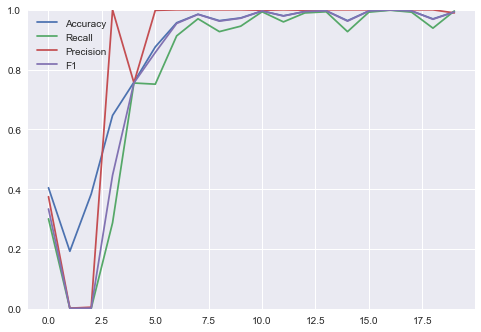

In [216]:
plt.plot(overADASYN_dt_acc_scores)
plt.plot(overADASYN_dt_rec_scores)
plt.plot(overADASYN_dt_pre_scores)
plt.plot(overADASYN_dt_f1_scores)
plt.ylim((0,1))
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1'], loc='upper left')
plt.show()

#### Over Sampling methods give a much better performance than the Under Sampling and Class Weight Tunning methods
Although ADASYN gives a higher mean f1-score, the performance is unstable (as shown in the above graph). SMOTE has a lower averge f1-score than random sampling. Thus, Over-Sampling with Random Sampling is chosen for solving the imbalanced problem in our data set 

### 3.2 Random Forest: ensemble model of Decision Tree classifiers (with the Over-Sampling data set)

In [34]:
#over-sampling with random sample
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=460349262)
X_resampled, y_resampled = ros.fit_sample(all_inputs, targetClass)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

#split the over-sample data set
from sklearn.model_selection import train_test_split
(over_training_inputs,
 over_testing_inputs,
 over_training_classes,
 over_testing_classes) = train_test_split(X_resampled, y_resampled, test_size=0.25, train_size=0.75, random_state=460349262)
from sklearn.tree import DecisionTreeClassifier

#build the random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features='auto',
                             n_estimators=100,
                             criterion='gini', 
                             max_depth=4, 
                             min_samples_split=2, 
                             random_state=460349262)  
                              
rfc.fit(over_training_inputs, over_training_classes)
over_pred_rf=rfc.predict_proba(over_testing_inputs)
over_predl_rf=rfc.predict(over_testing_inputs)
over_gold_rf=over_testing_classes

#classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(over_gold_rf, over_predl_rf, target_names=target_names))

[(0, 15604), (1, 15604)]
             precision    recall  f1-score   support

    class 0       0.73      0.70      0.72      3839
    class 1       0.72      0.75      0.74      3963

avg / total       0.73      0.73      0.73      7802



### Cross Validation on Random Forest

In [35]:
#Cross-validation on Random Forest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#Specify the splitting strategy of the data set 
sk = StratifiedKFold(n_splits=20, random_state=1)

#Accuracy
rf_acc_scores = cross_val_score(rfc, X_resampled, y_resampled, cv=sk, scoring='accuracy')
print('Accuracy scores:'+ str(rf_acc_scores))
#The mean of the Decision Tree scores
print('The mean value of the accuracy score: '+str(sum(rf_acc_scores)/20))

#Recall(Sensitivity/True Positive Rate)
rf_rec_scores = cross_val_score(rfc, X_resampled, y_resampled, cv=sk, scoring='recall')
print('Recall(True Positive Rate) scores'+ str(rf_rec_scores))
#The mean of the Decision Tree scores
print('The mean value of the Recall score: '+str(sum(rf_rec_scores)/20))

#Precision
rf_pre_scores = cross_val_score(rfc, X_resampled, y_resampled, cv=sk, scoring='precision')
print('Precision scores:'+ str(rf_pre_scores))
#The mean of the Decision Tree scores
print('The mean value of the Precision score: '+str(sum(rf_pre_scores)/20))

# F1-Score
rf_f1_scores = cross_val_score(rfc, X_resampled, y_resampled, cv=sk, scoring='f1')
print('The distribution of prediction f1 score of the DecisionTree Classifer: '+ str(rf_f1_scores))
#The mean of the Decision Tree scores
print('The mean value of the f1 score: '+str(sum(rf_f1_scores)/20))

Accuracy scores:[ 0.70038412  0.71959027  0.71766965  0.71190781  0.74551282  0.73141026
  0.73525641  0.72307692  0.70448718  0.73076923  0.75897436  0.67628205
  0.73397436  0.74102564  0.70833333  0.72692308  0.73141026  0.75384615
  0.72435897  0.74038462]
The mean value of the accuracy score: 0.725778874881
Recall(True Positive Rate) scores[ 0.73751601  0.75800256  0.73879641  0.74135723  0.77435897  0.74230769
  0.73333333  0.74871795  0.72307692  0.77692308  0.76025641  0.71794872
  0.7525641   0.75512821  0.73333333  0.76025641  0.71538462  0.74358974
  0.73717949  0.75512821]
The mean value of the Recall score: 0.74525796973
Precision scores:[ 0.68653159  0.7039239   0.70884521  0.70012092  0.73212121  0.72647428
  0.73616474  0.71219512  0.69715698  0.71126761  0.75831202  0.66272189
  0.72558714  0.73441397  0.6984127   0.71274038  0.73907285  0.7591623
  0.71875     0.73349938]
The mean value of the Precision score: 0.717873709344
The distribution of prediction f1 score of 

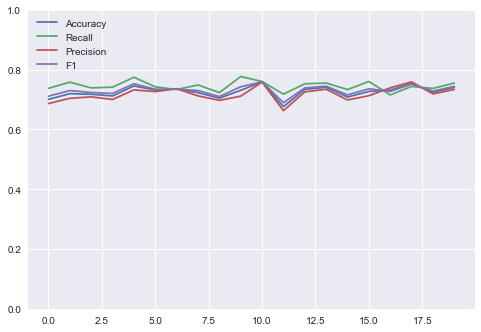

In [36]:
plt.plot(rf_acc_scores)
plt.plot(rf_rec_scores)
plt.plot(rf_pre_scores)
plt.plot(rf_f1_scores)
plt.ylim((0,1))
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1'], loc='upper left')
plt.show()

### Use the model to predict all data points to calculate cost

In [37]:
rfc_cost_labels=rfc.predict(all_inputs)

### 3.3 Feature Selection with Random Forest 

### Extract Feature Importance 

In [38]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
indices_name=[input_cols[inx] for inx in indices]
# Print the feature ranking
print("Feature ranking:")

for f in range(over_training_inputs.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]])+" "+indices_name[f])

Feature ranking:
1. feature 45 (0.168626) LTFREDAY
2. feature 1 (0.120505) FRE
3. feature 36 (0.090675) STYLES
4. feature 43 (0.071356) RESPONSERATE
5. feature 2 (0.070396) MON
6. feature 34 (0.066055) CLASSES
7. feature 0 (0.047612) REC
8. feature 32 (0.044983) FREDAYS
9. feature 27 (0.042260) SMONSPEND
10. feature 25 (0.038605) TMONSPEND
11. feature 42 (0.033392) RESPONDED
12. feature 3 (0.030018) CC_CARD
13. feature 44 (0.029657) HI
14. feature 35 (0.025574) COUPONS
15. feature 26 (0.019437) OMONSPEND
16. feature 23 (0.013344) CCSPEND
17. feature 46 (0.010272) PERCRET
18. feature 37 (0.007892) STORES
19. feature 30 (0.007351) PROMOS
20. feature 31 (0.007190) DAYS
21. feature 41 (0.006898) MAILED
22. feature 12 (0.004555) PCAS_PNTS
23. feature 4 (0.004503) AVRG
24. feature 7 (0.004477) PKNIT_TOPS
25. feature 18 (0.004093) PFASHION
26. feature 33 (0.003812) MARKDOWN
27. feature 40 (0.003395) WEB
28. feature 22 (0.003096) PSSPEND
29. feature 8 (0.003037) PKNIT_DRES
30. feature 13 (0.00

### Identify and Select Most Important Features
The feature importance threshold is set to 0.001

In [39]:
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.001
sf_rfc = SelectFromModel(rfc, threshold=0.001)

# Train the selector
sf_rfc.fit(over_training_inputs, over_training_classes)

# Print the names of the most important features
print("Selected Features:")
sf_input_cols=[]
for feature_list_index in sf_rfc.get_support(indices=True):
    sf_input_cols.append(input_cols[feature_list_index])
    print(input_cols[feature_list_index])

Selected Features:
REC
FRE
MON
CC_CARD
AVRG
PKNIT_TOPS
PKNIT_DRES
PBLOUSES
PCAR_PNTS
PCAS_PNTS
PSHIRTS
PFASHION
PLEGWEAR
PSSPEND
CCSPEND
TMONSPEND
OMONSPEND
SMONSPEND
PREVPD
PROMOS
DAYS
FREDAYS
MARKDOWN
CLASSES
COUPONS
STYLES
STORES
WEB
MAILED
RESPONDED
RESPONSERATE
HI
LTFREDAY
PERCRET


### Create new Data set with selected features

In [40]:
# prepare the all the input data
sf_all_inputs = clean_Data[sf_input_cols].values

#over-sampling with random sample
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=460349262)
X_resampled, y_resampled = ros.fit_sample(sf_all_inputs, targetClass)

#split the over-sample data set with selected features
from sklearn.model_selection import train_test_split
(over_training_inputs,
 over_testing_inputs,
 over_training_classes,
 over_testing_classes) = train_test_split(X_resampled, y_resampled, test_size=0.25, train_size=0.75, random_state=460349262)

### Train the Random Forest Classifer with the Selected Features

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc_sf = RandomForestClassifier(max_features='auto',
                             n_estimators=100,
                             criterion='gini', 
                             max_depth=4, 
                             min_samples_split=2, 
                             random_state=460349262)  
                              
rfc_sf.fit(over_training_inputs, over_training_classes)
sf_over_pred_rf=rfc_sf.predict_proba(over_testing_inputs)
sf_over_gold_rf=over_testing_classes
sf_over_predl_rf=rfc_sf.predict(over_testing_inputs)
#classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(sf_over_gold_rf, sf_over_predl_rf, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.75      0.71      0.73      3839
    class 1       0.73      0.77      0.75      3963

avg / total       0.74      0.74      0.74      7802



### Coss Validation of the Random Forest after Feature Selection

In [285]:
#Cross-validation on Random Forest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#Specify the splitting strategy of the data set 
sk = StratifiedKFold(n_splits=20, random_state=1)

#Accuracy
sf_rf_acc_scores = cross_val_score(rfc_sf, X_resampled, y_resampled, cv=sk, scoring='accuracy')
print('Accuracy scores:'+ str(sf_rf_acc_scores))
#The mean of the Decision Tree scores
print('The mean value of the accuracy score: '+str(sum(sf_rf_acc_scores)/20))

#Recall(Sensitivity/True Positive Rate)
sf_rf_rec_scores = cross_val_score(rfc_sf, X_resampled, y_resampled, cv=sk, scoring='recall')
print('Recall(True Positive Rate) scores'+ str(sf_rf_rec_scores))
#The mean of the Decision Tree scores
print('The mean value of the Recall score: '+str(sum(sf_rf_rec_scores)/20))

#Precision
sf_rf_pre_scores = cross_val_score(rfc_sf, X_resampled, y_resampled, cv=sk, scoring='precision')
print('Precision scores:'+ str(sf_rf_pre_scores))
#The mean of the Decision Tree scores
print('The mean value of the Precision score: '+str(sum(sf_rf_pre_scores)/20))

# F1-Score
sf_rf_f1_scores = cross_val_score(rfc_sf, X_resampled, y_resampled, cv=sk, scoring='f1')
print('The distribution of prediction f1 score of the DecisionTree Classifer: '+ str(sf_rf_f1_scores))
#The mean of the Decision Tree scores
print('The mean value of the f1 score: '+str(sum(sf_rf_f1_scores)/20))

Accuracy scores:[ 0.72663252  0.7368758   0.7234315   0.7234315   0.76282051  0.73846154
  0.74871795  0.73269231  0.71666667  0.74294872  0.77371795  0.70641026
  0.74615385  0.7474359   0.70897436  0.73012821  0.74935897  0.77307692
  0.74487179  0.74615385]
The mean value of the accuracy score: 0.738948053121
Recall(True Positive Rate) scores[ 0.76952625  0.78104994  0.74775928  0.76824584  0.8025641   0.76282051
  0.75128205  0.77179487  0.73846154  0.79230769  0.79358974  0.74230769
  0.77820513  0.78076923  0.75384615  0.77051282  0.7474359   0.77820513
  0.77179487  0.77948718]
The mean value of the Recall score: 0.76909829607
Precision scores:[ 0.70872642  0.71764706  0.71306471  0.70505288  0.74346793  0.72738386
  0.74744898  0.71581451  0.70761671  0.72112019  0.76325524  0.69258373
  0.7313253   0.73197115  0.69176471  0.71293001  0.75032175  0.77030457
  0.7323601   0.73076923]
The mean value of the Precision score: 0.72574645176
The distribution of prediction f1 score of 

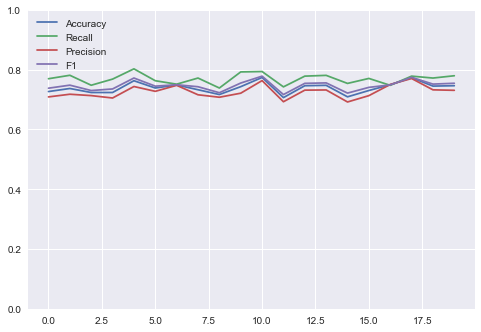

In [286]:
plt.plot(sf_rf_acc_scores)
plt.plot(sf_rf_rec_scores)
plt.plot(sf_rf_pre_scores)
plt.plot(sf_rf_f1_scores)
plt.ylim((0,1))
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1'], loc='upper left')
plt.show()

### Predict all data points for cost calculation

In [43]:
sfrfc_cost_labels=rfc_sf.predict(sf_all_inputs)

### 3.2 The SVM Classifier with Linear Kernel Function (use the normalized data)

### Over-Sample and Split the normalized data

In [45]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=460349262)
X_resampled, y_resampled = ros.fit_sample(normalized_inputs, targetClass)
#split the over-sample data set
from sklearn.model_selection import train_test_split
(nor_training_inputs,
 nor_testing_inputs,
 nor_training_classes,
 nor_testing_classes) = train_test_split(X_resampled, y_resampled, test_size=0.25, train_size=0.75, random_state=460349262)

### Train a simple Linear SVM Classifier:

In [46]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
svmc=LinearSVC(random_state=460349262)
svmc.fit(nor_training_inputs, nor_training_classes)

pred_svm=svmc.predict(nor_testing_inputs)
gold_svm=nor_testing_classes

#classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(gold_svm, pred_svm, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.77      0.67      0.72      3839
    class 1       0.72      0.80      0.76      3963

avg / total       0.74      0.74      0.74      7802



### Use GridSearch Cross Validation to tune the parameters：

In [329]:
#Parameter tuning
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
parameters = {
              'C': [0.1,1,10],
              'loss': ['hinge', 'squared_hinge']
             }
#Specify the splitting strategy of the data set (using random_state 1) 
sk = StratifiedKFold(n_splits=5, random_state=460349262)
grid_search = GridSearchCV(svmc,param_grid=parameters, cv=sk)
grid_search.fit(X_resampled, y_resampled)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7396500897205844
Best parameters: {'C': 10, 'loss': 'hinge'}


In [47]:
svmc=LinearSVC(C=10,loss='hinge',random_state=460349262)
svmc.fit(nor_training_inputs, nor_training_classes)

pred_svm=svmc.decision_function(nor_testing_inputs)
predl_svm=svmc.predict(nor_testing_inputs)
gold_svm=nor_testing_classes

#classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(gold_svm, predl_svm, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.84      0.58      0.68      3839
    class 1       0.69      0.89      0.78      3963

avg / total       0.76      0.74      0.73      7802



### Cross-Validation of the SVM model 

In [380]:
#Cross-validation on Linear SVM
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#Specify the splitting strategy of the data set 
sk = StratifiedKFold(n_splits=20, random_state=1)

#Accuracy
svm_acc_scores = cross_val_score(svmc, X_resampled, y_resampled, cv=sk, scoring='accuracy')
print('Accuracy scores:'+ str(svm_acc_scores))
#The mean of the Decision Tree scores
print('The mean value of the accuracy score: '+str(sum(svm_acc_scores)/20))

#Recall(Sensitivity/True Positive Rate)
svm_rec_scores = cross_val_score(svmc, X_resampled, y_resampled, cv=sk, scoring='recall')
print('Recall(True Positive Rate) scores'+ str(svm_rec_scores))
#The mean of the Decision Tree scores
print('The mean value of the Recall score: '+str(sum(svm_rec_scores)/20))

#Precision
svm_pre_scores = cross_val_score(svmc, X_resampled, y_resampled, cv=sk, scoring='precision')
print('Precision scores:'+ str(svm_pre_scores))
#The mean of the Decision Tree scores
print('The mean value of the Precision score: '+str(sum(svm_pre_scores)/20))

# F1-Score
svm_f1_scores = cross_val_score(svmc, X_resampled, y_resampled, cv=sk, scoring='f1')
print('F1 scores: '+ str(svm_f1_scores))
#The mean of the Decision Tree scores
print('The mean value of the f1 score: '+str(sum(svm_f1_scores)/20))

Accuracy scores:[ 0.72919334  0.71382843  0.73751601  0.71895006  0.75        0.74551282
  0.74679487  0.71089744  0.73141026  0.75192308  0.76346154  0.71730769
  0.74230769  0.76025641  0.7275641   0.68846154  0.76153846  0.78461538
  0.76089744  0.74423077]
The mean value of the accuracy score: 0.739333366164
Recall(True Positive Rate) scores[ 0.90396927  0.87964149  0.90268886  0.89756722  0.89487179  0.88717949
  0.88205128  0.90512821  0.8974359   0.91025641  0.89487179  0.8974359
  0.89487179  0.91923077  0.88846154  0.90641026  0.87692308  0.90769231
  0.90512821  0.88717949]
The mean value of the Recall score: 0.896949752126
Precision scores:[ 0.66982922  0.66057692  0.67853705  0.66132075  0.69383698  0.69130869
  0.69424823  0.65189289  0.67372474  0.69133398  0.70862944  0.65975495
  0.68565815  0.69747082  0.67216295  0.63125     0.7125      0.72839506
  0.70248756  0.68993021]
The mean value of the Precision score: 0.682742430408
F1 scores: [ 0.76948229  0.75453048  0.774

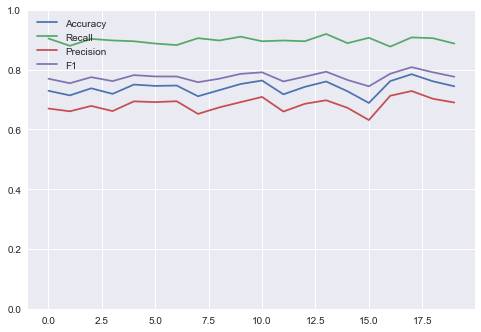

In [381]:
plt.plot(svm_acc_scores)
plt.plot(svm_rec_scores)
plt.plot(svm_pre_scores)
plt.plot(svm_f1_scores)
plt.ylim((0,1))
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1'], loc='upper left')
plt.show()

In [49]:
svmc_cost_labels=svmc.predict(normalized_inputs)

### Feature Selection with Recursive Feature Elimination method
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [421]:
#Decide how many features to keep
from sklearn.feature_selection import RFE
def rfe_lsvm(n):
    selector = RFE(estimator=svmc, n_features_to_select=n, step=1)
    selector = selector.fit(nor_training_inputs, nor_training_classes)
    print(n)
    print(selector.score(nor_testing_inputs, nor_testing_classes))
num_f=[5,15,25,35] 
for n in num_f:
    rfe_lsvm(n)

5
0.688925916432
15
0.73724685978
25
0.739938477314
35
0.73724685978


According to the scoring result, 25 features will be selected by the Recursive Feature Elimination method

In [51]:
from sklearn.feature_selection import RFE
#select the features by recursively feature elimiate
selector = RFE(estimator=svmc, n_features_to_select=25, step=1)
selector = selector.fit(nor_training_inputs, nor_training_classes)
index=0
print("The selected features are:")
selected_f=[]
for bol in selector.support_:
    if bol:
        print(input_cols[index])
        selected_f.append(input_cols[index])
    index=index+1   
print(selector.score(nor_testing_inputs, nor_testing_classes))

The selected features are:
FRE
MON
CC_CARD
AVRG
PC_CALC20
AXSPEND
TMONSPEND
SMONSPEND
GMP
DAYS
FREDAYS
CLASSES
COUPONS
STORES
STORELOY
VALPHON
WEB
MAILED
RESPONDED
RESPONSERATE
HI
LTFREDAY
ZIP_CODE_60000~69999
ZIP_CODE_70000~79999
CLUSTYPE_1
0.739938477314


### Train the model again with the selected features  

In [52]:
from sklearn import preprocessing
# prepare thae all the input data
sf_all_inputs = clean_Data[selected_f].values
normalizer = preprocessing.Normalizer().fit(sf_all_inputs)
normalized_sf_inputs=normalizer.transform(sf_all_inputs)

#over-sampling with random sample
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=460349262)
sfsvm_X_resampled, sfsvm_y_resampled = ros.fit_sample(normalized_sf_inputs, targetClass)

#split the over-sample data set with selected features
from sklearn.model_selection import train_test_split
(sfnor_training_inputs,
 sfnor_testing_inputs,
 sfnor_training_classes,
 sfnor_testing_classes) = train_test_split(sfsvm_X_resampled, sfsvm_y_resampled, test_size=0.25, train_size=0.75, random_state=460349262)

In [53]:
sf_svmc=LinearSVC(random_state=460349262)
sf_svmc.fit(sfnor_training_inputs, sfnor_training_classes)

sf_pred_svm=sf_svmc.decision_function(sfnor_testing_inputs)
sf_predl_svm=sf_svmc.predict(sfnor_testing_inputs)
sf_gold_svm=sfnor_testing_classes

#classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(sf_gold_svm, sf_predl_svm, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.77      0.67      0.72      3839
    class 1       0.72      0.81      0.76      3963

avg / total       0.74      0.74      0.74      7802



### Cross-Validation of LinearSVM after Feature Selection

In [441]:
#Cross-validation on Linear SVM
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#Specify the splitting strategy of the data set 
sk = StratifiedKFold(n_splits=20, random_state=1)

#Accuracy
sf_svm_acc_scores = cross_val_score(sf_svmc, sfsvm_X_resampled, sfsvm_y_resampled, cv=sk, scoring='accuracy')
print('Accuracy scores:'+ str(sf_svm_acc_scores))
#The mean of the Decision Tree scores
print('The mean value of the accuracy score: '+str(sum(sf_svm_acc_scores)/20))

#Recall(Sensitivity/True Positive Rate)
sf_svm_rec_scores = cross_val_score(sf_svmc, sfsvm_X_resampled, sfsvm_y_resampled, cv=sk, scoring='recall')
print('Recall(True Positive Rate) scores'+ str(sf_svm_rec_scores))
#The mean of the Decision Tree scores
print('The mean value of the Recall score: '+str(sum(sf_svm_rec_scores)/20))

#Precision
sf_svm_pre_scores = cross_val_score(sf_svmc, sfsvm_X_resampled, sfsvm_y_resampled, cv=sk, scoring='precision')
print('Precision scores: '+ str(sf_svm_pre_scores))
#The mean of the Decision Tree scores
print('The mean value of the Precision score: '+str(sum(sf_svm_pre_scores)/20))

# F1-Score
sf_svm_f1_scores = cross_val_score(sf_svmc, sfsvm_X_resampled, sfsvm_y_resampled, cv=sk, scoring='f1')
print('F1 scores: ' + str(sf_svm_f1_scores))
#The mean of the Decision Tree scores
print('The mean value of the f1 score: '+str(sum(sf_svm_f1_scores)/20))

Accuracy scores:[ 0.73303457  0.7240717   0.73111396  0.73367478  0.74935897  0.7474359
  0.74102564  0.73333333  0.73333333  0.74871795  0.7525641   0.71602564
  0.7275641   0.75705128  0.70897436  0.75064103  0.75448718  0.76474359
  0.73141026  0.74358974]
The mean value of the accuracy score: 0.739107570833
Recall(True Positive Rate) scores[ 0.82202305  0.81049936  0.79385403  0.83738796  0.81794872  0.81153846
  0.78717949  0.82820513  0.81025641  0.84102564  0.82179487  0.81282051
  0.8025641   0.82820513  0.78589744  0.82948718  0.79358974  0.79871795
  0.78974359  0.79102564]
The mean value of the Recall score: 0.81068822023
Precision scores: [ 0.69782609  0.69104803  0.70534699  0.69353128  0.71927847  0.71931818
  0.72065728  0.69612069  0.70222222  0.70995671  0.72184685  0.68098818
  0.69788183  0.72502806  0.68111111  0.71650055  0.73602854  0.74789916
  0.70723307  0.72248244]
The mean value of the Precision score: 0.709615285944
F1 scores: [ 0.75485009  0.74602239  0.746

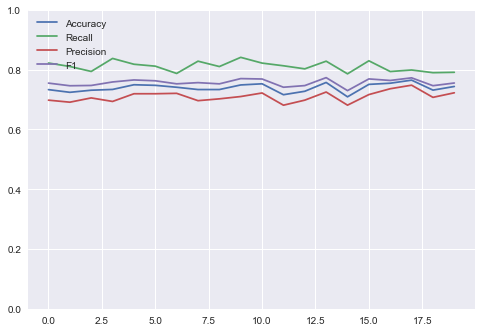

In [443]:
plt.plot(sf_svm_acc_scores)
plt.plot(sf_svm_rec_scores)
plt.plot(sf_svm_pre_scores)
plt.plot(sf_svm_f1_scores)
plt.ylim((0,1))
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1'], loc='upper left')
plt.show()

### Predict all data points to calculate the cost

In [56]:
sfsvmc_cost_labels=sf_svmc.predict(normalized_sf_inputs)

### 3.3 KNeighbors Classifier

### Over-sample and split the normalized data set

In [57]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=460349262)
X_resampled, y_resampled = ros.fit_sample(normalized_inputs, targetClass)
#split the over-sample data set
from sklearn.model_selection import train_test_split
(nor_training_inputs,
 nor_testing_inputs,
 nor_training_classes,
 nor_testing_classes) = train_test_split(X_resampled, y_resampled, test_size=0.25, train_size=0.75, random_state=460349262)

### Train a simple KNeighbors Classifier

In [461]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(algorithm='auto')
knc.fit(nor_training_inputs, nor_training_classes)
pred_kn=knc.predict(nor_testing_inputs)
gold_kn=nor_testing_classes
#classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(gold_kn, pred_kn, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.90      0.67      0.77      3839
    class 1       0.74      0.93      0.83      3963

avg / total       0.82      0.80      0.80      7802



### Use GridSearch Cross Validation to choose the best k

In [463]:
#Parameter tuning
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_neighbors': [2, 3, 4, 5, 6],                
             }
#Specify the splitting strategy of the data set (using random_state 1) 
sk = StratifiedKFold(n_splits=10, random_state=460349262)
grid_search = GridSearchCV(knc,param_grid=parameters, cv=sk)
grid_search.fit(X_resampled, y_resampled)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.924057933863112
Best parameters: {'n_neighbors': 2}


### Train the KNeighbors Classifier with best k

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=2, algorithm='auto')
knc.fit(nor_training_inputs, nor_training_classes)
pred_kn=knc.predict_proba(nor_testing_inputs)
predl_kn=knc.predict(nor_testing_inputs)
gold_kn=nor_testing_classes
#classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(gold_kn, predl_kn, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.95      0.85      0.89      3839
    class 1       0.87      0.95      0.91      3963

avg / total       0.91      0.90      0.90      7802



### Cross Validation of the model

In [465]:
#Cross-validation on Linear SVM
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#Specify the splitting strategy of the data set 
sk = StratifiedKFold(n_splits=20, random_state=1)

#Accuracy
kn_acc_scores = cross_val_score(knc, X_resampled, y_resampled, cv=sk, scoring='accuracy')
print('Accuracy scores:'+ str(kn_acc_scores))
#The mean of the Decision Tree scores
print('The mean value of the accuracy score: '+str(sum(kn_acc_scores)/20))

#Recall(Sensitivity/True Positive Rate)
kn_rec_scores = cross_val_score(knc, X_resampled, y_resampled, cv=sk, scoring='recall')
print('Recall(True Positive Rate) scores'+ str(kn_rec_scores))
#The mean of the Decision Tree scores
print('The mean value of the Recall score: '+str(sum(kn_rec_scores)/20))

#Precision
kn_pre_scores = cross_val_score(knc, X_resampled, y_resampled, cv=sk, scoring='precision')
print('Precision scores: '+ str(kn_pre_scores))
#The mean of the Decision Tree scores
print('The mean value of the Precision score: '+str(sum(kn_pre_scores)/20))

# F1-Score
kn_f1_scores = cross_val_score(knc, X_resampled, y_resampled, cv=sk, scoring='f1')
print('F1 scores: ' + str(kn_f1_scores))
#The mean of the Decision Tree scores
print('The mean value of the f1 score: '+str(sum(kn_f1_scores)/20))

Accuracy scores:[ 0.92317542  0.90973111  0.91677337  0.92829706  0.93076923  0.93589744
  0.93205128  0.91794872  0.91410256  0.93269231  0.93910256  0.91410256
  0.92820513  0.9275641   0.92628205  0.92115385  0.93910256  0.93974359
  0.94423077  0.93012821]
The mean value of the accuracy score: 0.927552693785
Recall(True Positive Rate) scores[ 0.96798976  0.95518566  0.96286812  0.97567222  0.99102564  0.9974359
  0.99358974  0.98205128  0.99358974  0.98333333  0.99615385  0.99230769
  0.98846154  0.99230769  0.99230769  0.98717949  0.99358974  0.98461538
  0.99230769  0.99230769]
The mean value of the Recall score: 0.98571399258
Precision scores: [ 0.88836663  0.87558685  0.88159437  0.89122807  0.88443936  0.88812785
  0.8847032   0.87045455  0.85730088  0.89289872  0.89413119  0.85809313
  0.88215103  0.87854711  0.87655719  0.87202718  0.89595376  0.90352941
  0.90526316  0.88255416]
The mean value of the Precision score: 0.883175389575
F1 scores: [ 0.92647059  0.91365585  0.920

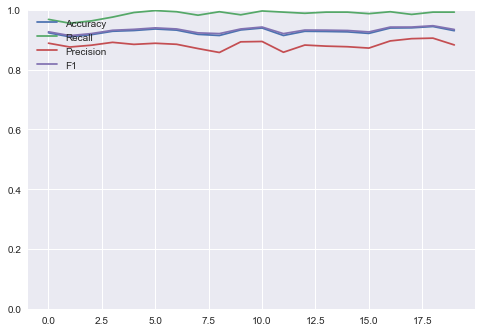

In [469]:
plt.plot(kn_acc_scores)
plt.plot(kn_rec_scores)
plt.plot(kn_pre_scores)
plt.plot(kn_f1_scores)
plt.ylim((0,1))
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1'], loc='upper left')
plt.show()

### Predict all the points to calculate cost

In [61]:
kn_cost_labels=knc.predict(normalized_inputs)

### Build models with the selected features
Since KNeighborsClassifier doesn't return feature importance, we will use the feature selection result from linearSVM to build a efficient model

In [62]:
sf_knc=KNeighborsClassifier(n_neighbors=2, algorithm='auto')
sf_knc.fit(sfnor_training_inputs, sfnor_training_classes)

sf_pred_kn=sf_knc.predict_proba(sfnor_testing_inputs)
sf_predl_kn=sf_knc.predict(sfnor_testing_inputs)
sf_gold_kn=sfnor_testing_classes

#classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(sf_gold_kn, sf_predl_kn, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.95      0.85      0.90      3839
    class 1       0.87      0.96      0.91      3963

avg / total       0.91      0.90      0.90      7802



### Cross Validation of the Model only using the selected features

In [474]:
#Cross-validation on Linear SVM
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#Specify the splitting strategy of the data set 
sk = StratifiedKFold(n_splits=20, random_state=1)

#Accuracy
sfkn_acc_scores = cross_val_score(sf_knc, sfsvm_X_resampled, sfsvm_y_resampled, cv=sk, scoring='accuracy')
print('Accuracy scores:'+ str(sfkn_acc_scores))
#The mean of the Decision Tree scores
print('The mean value of the accuracy score: '+str(sum(sfkn_acc_scores)/20))

#Recall(Sensitivity/True Positive Rate)
sfkn_rec_scores = cross_val_score(sf_knc, sfsvm_X_resampled, sfsvm_y_resampled, cv=sk, scoring='recall')
print('Recall(True Positive Rate) scores'+ str(sfkn_rec_scores))
#The mean of the Decision Tree scores
print('The mean value of the Recall score: '+str(sum(sfkn_rec_scores)/20))

#Precision
sfkn_pre_scores = cross_val_score(sf_knc, sfsvm_X_resampled, sfsvm_y_resampled, cv=sk, scoring='precision')
print('Precision scores: '+ str(sfkn_pre_scores))
#The mean of the Decision Tree scores
print('The mean value of the Precision score: '+str(sum(sfkn_pre_scores)/20))

# F1-Score
sfkn_f1_scores = cross_val_score(sf_knc, sfsvm_X_resampled, sfsvm_y_resampled, cv=sk, scoring='f1')
print('F1 scores: ' + str(sfkn_f1_scores))
#The mean of the Decision Tree scores
print('The mean value of the f1 score: '+str(sum(sfkn_f1_scores)/20))

Accuracy scores:[ 0.91165173  0.91037132  0.92765685  0.92253521  0.93525641  0.93333333
  0.93974359  0.92628205  0.93525641  0.92435897  0.93782051  0.9224359
  0.93333333  0.93205128  0.9275641   0.9275641   0.93846154  0.93910256
  0.92564103  0.93653846]
The mean value of the accuracy score: 0.929347934929
Recall(True Positive Rate) scores[ 0.96286812  0.96158771  0.96542894  0.97695262  0.98846154  0.9974359
  0.99358974  0.98846154  0.99358974  0.98333333  0.9974359   0.99102564
  0.98974359  0.99102564  0.99230769  0.98974359  0.98974359  0.98846154
  0.99230769  0.99615385]
The mean value of the Recall score: 0.986482895039
Precision scores: [ 0.87340302  0.87224158  0.89761905  0.88106236  0.89339513  0.88409091
  0.89699074  0.87913341  0.88978186  0.87958716  0.89117984  0.87147689
  0.88940092  0.88646789  0.87854711  0.88027366  0.89767442  0.89964994
  0.87556561  0.89003436]
The mean value of the Precision score: 0.885378792583
F1 scores: [ 0.91595615  0.91473812  0.930

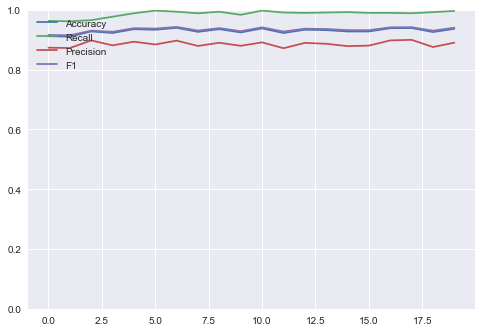

In [475]:
plt.plot(sfkn_acc_scores)
plt.plot(sfkn_rec_scores)
plt.plot(sfkn_pre_scores)
plt.plot(sfkn_f1_scores)
plt.ylim((0,1))
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1'], loc='upper left')
plt.show()

In [63]:
sfkn_cost_labels=sf_knc.predict(normalized_sf_inputs)

### 4. Model Evaluation


### 4.1 Expected Gross profit from a cutomer for each model 

### Expected Gross Profit (Benefit-Cost) Calculation for each customer:
Assume a respond of the mailing from a customer generates 1 visit and spend

#### TP: Average amount spent per visit X Gross margin percentage-Estimated mailing cost-Estimated mailing cost X interest rate return
#### FN: Estimated mailing cost X interest rate return-Average amount spent per visit X gross margin percentage
#### FP: 0-Estimated mailing cost-Estimated mailing cost X interest rate return
#### TN: Estimated mailing cost X interest rate return-0
#### interest rate return: 0.4525% 
use the current yield on 2 year government bonds, which is 1.83% from Bloomberg
assume it's a quarterly campaign, then 1.81% yearly is 0.4525% earned in a quarter
#### Estimated mailing cost: 1.0099=0.985+0.0249
assume posting direct mail in regular time table from AU POST, with letter size is less than 250 g and smaller than 130 x 240 x 5mm, the mailing cost is 0.985
https://l.facebook.com/l.php?u=https%3A%2F%2Fauspost.com.au%2Fbusiness%2Fmarketing-and-communications%2Fbulk-mailouts%2Fbulk-mail-options%2Fmetered-imprint-mail%23tab2&h=ATOBQlCFdje2toOeOXC2X6v9pyYvBuRag-ECeSJpYTClTgyIy2toEFYMrZkx4AGrRnXYGVRCT2qbxyBvs3E1tqEoulSYfmnw6_-8O8S0Z04shqBW1guWyP2kAlih34XHRQ1v9fmAn7kYx_gpcF8
we assume we print 10,000 Flyers per time, the printing cost is 0.0249
http://bellprint.com.au/flyer-printing-specials/dl-flyer-specials.html

In [102]:
#len(targetClass)
#The labelling of all model
labels=[rfc_cost_labels, sfrfc_cost_labels, svmc_cost_labels, 
        sfsvmc_cost_labels, kn_cost_labels, sfkn_cost_labels]
model_names=["RFC", "sf_RFC", "linearSvm", "sf_LinearSvm", "kNN", "sf_KNN"]
#initiate a column to store the expected gross profit in the data frame
for model in model_names:
    clean_Data[model+" EGP"]=None

In [106]:
#calculate the profit(Benefit-Cost) of each customer for a model 
#The return result will be stored in the data frame

#Average amount spent per visit
#data['AVRG']
#Gross margin percentage
#data['GMP']
#Estimated mailing cost
emc=1.0099
#interest rate return
irr=0.004525

#for each customer
for index, row in clean_Data.iterrows():
    #Average amount spent per visit
    avg=row['AVRG']
    #Gross margin percentage
    gmp=row['GMP']   
    #for each model
    for i in range(6):
        #labelling
        lb=labels[i]
        lb=lb[index]
        #gold
        gd=targetClass[index]
        
        #TP
        if(lb==1 and gd==1):
            profit=avg*gmp-emc-emc*irr
        #FN
        elif(lb==0 and gd==1):
            profit=0-emc*irr-avg*gmp
        #FP
        elif(lb==1 and gd==0):
            profit=0-emc-emc*irr
        #TN
        elif(lb==0 and gd==0):
            profit=emc*irr
        
        #store the profit
        model_col=model_names[i]+" EGP"
        clean_Data.loc[index, model_col]=profit
                
EGP_data=clean_Data[['HHKEY', 'RESP', 'RFC EGP', 'sf_RFC EGP', 'linearSvm EGP',
       'sf_LinearSvm EGP', 'kNN EGP', 'sf_KNN EGP']]

,HHKEY,RESP,RFC EGP,sf_RFC EGP,linearSvm EGP,sf_LinearSvm EGP,kNN EGP,sf_KNN EGP
0,9955600066402,0,0.0045698,0.0045698,0.0045698,0.0045698,-1.01447,0.0045698
1,9955600073501,1,33.8155,33.8155,33.8155,33.8155,33.8155,33.8155
2,9955600076313,0,0.0045698,0.0045698,0.0045698,0.0045698,0.0045698,0.0045698
3,9955600078045,0,-1.01447,-1.01447,-1.01447,-1.01447,0.0045698,0.0045698
4,9955600078517,0,0.0045698,0.0045698,0.0045698,0.0045698,0.0045698,0.0045698
5,9955600079035,0,0.0045698,0.0045698,0.0045698,0.0045698,0.0045698,0.0045698
6,9955600089274,0,0.0045698,0.0045698,0.0045698,0.0045698,0.0045698,0.0045698
7,9955600099772,1,46.8392,46.8392,46.8392,46.8392,46.8392,46.8392
8,9955600102456,0,0.0045698,0.0045698,0.0045698,0.0045698,0.0045698,0.0045698
9,9955600113010,0,0.0045698,0.0045698,0.0045698,0.0045698,0.0045698,0.0045698


### Descriptive Statistics of the Customer Expected Gross Profit returned from different models

In [118]:
EGP_data=EGP_data.astype(float)
EGP_data.iloc[:,2:8].describe()

,RFC EGP,sf_RFC EGP,linearSvm EGP,sf_LinearSvm EGP,kNN EGP,sf_KNN EGP
count,18309.000000,18309.000000,18309.000000,18309.000000,18309.000000,18309.000000
mean,3.213616,3.344729,5.363087,4.300546,6.847415,6.903702
std,22.675004,22.653086,22.215488,22.469535,21.769080,21.749975
min,-171.117670,-171.117670,-158.204570,-158.904570,-147.052570,-146.935770
25%,-1.014470,-1.014470,-1.014470,-1.014470,0.004570,0.004570
50%,0.004570,0.004570,0.004570,0.004570,0.004570,0.004570
75%,0.004570,0.004570,0.004570,0.004570,0.004570,0.004570
max,166.057930,166.057930,170.098630,170.098630,170.098630,170.098630


KNN after feature selection has the best mean value

### Compute 95% Confidence Inverval of Expected Gross Profit from a cutomer in different models

In [129]:
from scipy import stats
models_egp=['RFC EGP', 'sf_RFC EGP', 'linearSvm EGP', 'sf_LinearSvm EGP', 'kNN EGP', 'sf_KNN EGP']
for model in models_egp:
    a=EGP_data[model]
    mean, sigma = np.mean(a), np.std(a)
    conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma)
    print(model+":")
    print("Expected Gross Profit from a cutomer(Mean):")
    print(mean)
    print("95% CI:")
    print(conf_int)
    print("----------------------------------------------------------------------")

RFC EGP:
Expected Gross Profit from a cutomer(Mean):
3.213616363725418
95% CI:
(-41.22736085419433, 47.654593581645159)
----------------------------------------------------------------------
sf_RFC EGP:
Expected Gross Profit from a cutomer(Mean):
3.3447286636071745
95% CI:
(-41.053290607107158, 47.7427479343215)
----------------------------------------------------------------------
linearSvm EGP:
Expected Gross Profit from a cutomer(Mean):
5.363086870831194
95% CI:
(-38.177280497729605, 48.903454239391998)
----------------------------------------------------------------------
sf_LinearSvm EGP:
Expected Gross Profit from a cutomer(Mean):
4.300545510763545
95% CI:
(-39.737730571604502, 48.338821593131584)
----------------------------------------------------------------------
kNN EGP:
Expected Gross Profit from a cutomer(Mean):
6.847414961716576
95% CI:
(-35.818031793534743, 49.51286171696789)
----------------------------------------------------------------------
sf_KNN EGP:
Expected Gros

### 4.2 K-fold Cross Validation has been used to evaluate all the model and the following scores are returned

### Accuracy

In [504]:
def make_evaluate_df(rf_acc_scores,sf_rf_acc_scores,svm_acc_scores,sf_svm_acc_scores,kn_acc_scores,sfkn_acc_scores):   
    ad={
        'Random Forest (Full Model)': np.append(rf_acc_scores, sum(rf_acc_scores)/20), 
        'Random Forest (Selected Features)': np.append(sf_rf_acc_scores, sum(sf_rf_acc_scores)/20), 
        'SVM (Full Model)': np.append(svm_acc_scores, sum(svm_acc_scores)/20), 
        'SVM (Selected Features)': np.append(sf_svm_acc_scores, sum(sf_svm_acc_scores)/20),
        'KNeighbors (Full Model)': np.append(kn_acc_scores, sum(kn_acc_scores)/20),
        'KNeighbors (Selected Features)': np.append(sfkn_acc_scores, sum(sfkn_acc_scores)/20)  
        }
    a_Dat=pd.DataFrame(ad, index=[i for i in range(1, 21)]+['AVG'])
    return a_Dat
a_Dat=make_evaluate_df(rf_acc_scores,sf_rf_acc_scores,svm_acc_scores,sf_svm_acc_scores,kn_acc_scores,sfkn_acc_scores)
a_Dat

,KNeighbors (Full Model),KNeighbors (Selected Features),Random Forest (Full Model),Random Forest (Selected Features),SVM (Full Model),SVM (Selected Features)
1,0.923175,0.911652,0.700384,0.726633,0.729193,0.733035
2,0.909731,0.910371,0.719590,0.736876,0.713828,0.724072
3,0.916773,0.927657,0.717670,0.723431,0.737516,0.731114
4,0.928297,0.922535,0.711908,0.723431,0.718950,0.733675
5,0.930769,0.935256,0.745513,0.762821,0.750000,0.749359
6,0.935897,0.933333,0.731410,0.738462,0.745513,0.747436
7,0.932051,0.939744,0.735256,0.748718,0.746795,0.741026
8,0.917949,0.926282,0.723077,0.732692,0.710897,0.733333
9,0.914103,0.935256,0.704487,0.716667,0.731410,0.733333
10,0.932692,0.924359,0.730769,0.742949,0.751923,0.748718


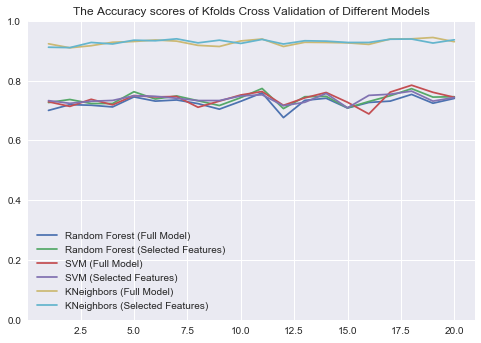

In [505]:
def make_evaluate_plot(a_Dat, score):
    plt.plot(a_Dat['Random Forest (Full Model)'][:-1])
    plt.plot(a_Dat['Random Forest (Selected Features)'][:-1])
    plt.plot(a_Dat['SVM (Full Model)'][:-1])
    plt.plot(a_Dat['SVM (Selected Features)'][:-1])
    plt.plot(a_Dat['KNeighbors (Full Model)'][:-1])
    plt.plot(a_Dat['KNeighbors (Selected Features)'][:-1])
    plt.ylim((0,1))
    plt.title("The "+score+" scores of Kfolds Cross Validation of Different Models")
    plt.legend(['Random Forest (Full Model)', 
            'Random Forest (Selected Features)', 
            'SVM (Full Model)', 
            'SVM (Selected Features)',
            'KNeighbors (Full Model)',
            'KNeighbors (Selected Features)'], loc='lower left')
    plt.show()
make_evaluate_plot(a_Dat, 'Accuracy')

### Recall

In [506]:
r_Dat=make_evaluate_df(rf_rec_scores,
                       sf_rf_rec_scores,
                       svm_rec_scores,
                       sf_svm_rec_scores,
                       kn_rec_scores,
                       sfkn_rec_scores)
r_Dat

,KNeighbors (Full Model),KNeighbors (Selected Features),Random Forest (Full Model),Random Forest (Selected Features),SVM (Full Model),SVM (Selected Features)
1,0.967990,0.962868,0.737516,0.769526,0.903969,0.822023
2,0.955186,0.961588,0.758003,0.781050,0.879641,0.810499
3,0.962868,0.965429,0.738796,0.747759,0.902689,0.793854
4,0.975672,0.976953,0.741357,0.768246,0.897567,0.837388
5,0.991026,0.988462,0.774359,0.802564,0.894872,0.817949
6,0.997436,0.997436,0.742308,0.762821,0.887179,0.811538
7,0.993590,0.993590,0.733333,0.751282,0.882051,0.787179
8,0.982051,0.988462,0.748718,0.771795,0.905128,0.828205
9,0.993590,0.993590,0.723077,0.738462,0.897436,0.810256
10,0.983333,0.983333,0.776923,0.792308,0.910256,0.841026


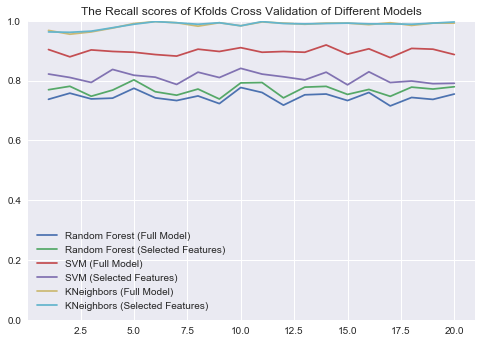

In [507]:
make_evaluate_plot(r_Dat, 'Recall')

### Precision

In [508]:
p_Dat=make_evaluate_df(rf_pre_scores,
                       sf_rf_pre_scores,
                       svm_pre_scores,
                       sf_svm_pre_scores,
                       kn_pre_scores,
                       sfkn_pre_scores)
p_Dat

,KNeighbors (Full Model),KNeighbors (Selected Features),Random Forest (Full Model),Random Forest (Selected Features),SVM (Full Model),SVM (Selected Features)
1,0.888367,0.873403,0.686532,0.708726,0.669829,0.697826
2,0.875587,0.872242,0.703924,0.717647,0.660577,0.691048
3,0.881594,0.897619,0.708845,0.713065,0.678537,0.705347
4,0.891228,0.881062,0.700121,0.705053,0.661321,0.693531
5,0.884439,0.893395,0.732121,0.743468,0.693837,0.719278
6,0.888128,0.884091,0.726474,0.727384,0.691309,0.719318
7,0.884703,0.896991,0.736165,0.747449,0.694248,0.720657
8,0.870455,0.879133,0.712195,0.715815,0.651893,0.696121
9,0.857301,0.889782,0.697157,0.707617,0.673725,0.702222
10,0.892899,0.879587,0.711268,0.721120,0.691334,0.709957


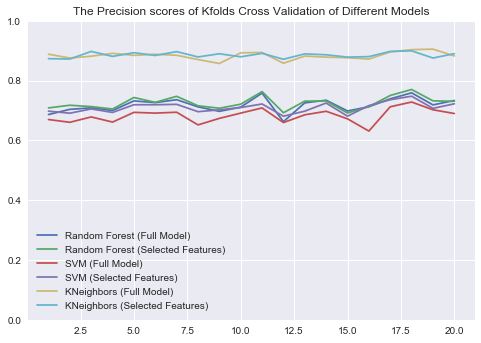

In [509]:
make_evaluate_plot(p_Dat, 'Precision')

### F1-Score

In [510]:
f_Dat=make_evaluate_df(rf_pre_scores,
                       sf_rf_pre_scores,
                       svm_pre_scores,
                       sf_svm_pre_scores,
                       kn_pre_scores,
                       sfkn_pre_scores)
f_Dat

,KNeighbors (Full Model),KNeighbors (Selected Features),Random Forest (Full Model),Random Forest (Selected Features),SVM (Full Model),SVM (Selected Features)
1,0.888367,0.873403,0.686532,0.708726,0.669829,0.697826
2,0.875587,0.872242,0.703924,0.717647,0.660577,0.691048
3,0.881594,0.897619,0.708845,0.713065,0.678537,0.705347
4,0.891228,0.881062,0.700121,0.705053,0.661321,0.693531
5,0.884439,0.893395,0.732121,0.743468,0.693837,0.719278
6,0.888128,0.884091,0.726474,0.727384,0.691309,0.719318
7,0.884703,0.896991,0.736165,0.747449,0.694248,0.720657
8,0.870455,0.879133,0.712195,0.715815,0.651893,0.696121
9,0.857301,0.889782,0.697157,0.707617,0.673725,0.702222
10,0.892899,0.879587,0.711268,0.721120,0.691334,0.709957


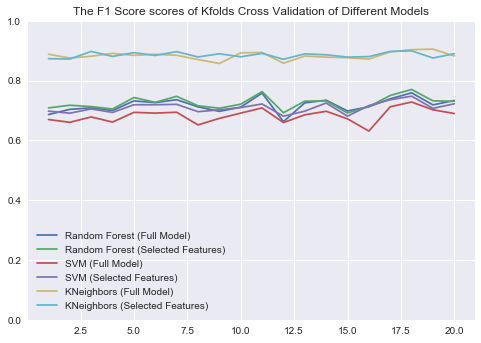

In [511]:
make_evaluate_plot(f_Dat, 'F1 Score')

### ROC Curve

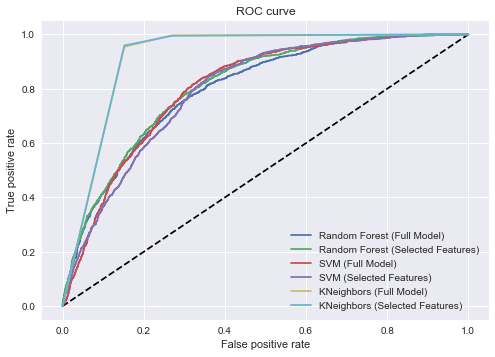

In [554]:
from sklearn.metrics import roc_curve
#random forest
fpr_rf, tpr_rf, _ = roc_curve(over_gold_rf, over_pred_rf[:,1])
fpr_sfrf, tpr_sfrf, _ = roc_curve(sf_over_gold_rf, sf_over_pred_rf[:,1])
#svm
fpr_svm, tpr_svm, _ = roc_curve(gold_svm, pred_svm)
fpr_sfsvm, tpr_sfsvm, _ = roc_curve(sf_gold_svm, sf_pred_svm)
#kn
fpr_kn, tpr_kn, _ = roc_curve(gold_kn, pred_kn[:,1])
fpr_sfkn, tpr_sfkn, _ = roc_curve(sf_gold_kn, sf_pred_kn[:,1])

from sklearn.metrics import roc_curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest (Full Model)')
plt.plot(fpr_sfrf, tpr_sfrf, label='Random Forest (Selected Features)')
plt.plot(fpr_svm, tpr_svm, label='SVM (Full Model)')
plt.plot(fpr_sfsvm, tpr_sfsvm, label='SVM (Selected Features)')
plt.plot(fpr_kn, tpr_kn, label='KNeighbors (Full Model)')
plt.plot(fpr_sfkn, tpr_sfkn, label='KNeighbors (Selected Features)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### AUC

In [558]:
from sklearn.metrics import roc_auc_score
#random forest
auc_rf = roc_auc_score(over_gold_rf, over_pred_rf[:,1])
auc_sfrf= roc_auc_score(sf_over_gold_rf, sf_over_pred_rf[:,1])
#svm
auc_svm = roc_auc_score(gold_svm, pred_svm)
auc_sfsvm = roc_auc_score(sf_gold_svm, sf_pred_svm)
#kn
auc_kn = roc_auc_score(gold_kn, pred_kn[:,1])
auc_sfkn = roc_auc_score(sf_gold_kn, sf_pred_kn[:,1])

aucd={
        'Random Forest (Full Model)': [auc_rf], 
        'Random Forest (Selected Features)': [auc_sfrf], 
        'SVM (Full Model)': [auc_svm], 
        'SVM (Selected Features)': [auc_sfsvm],
        'KNeighbors (Full Model)': [auc_kn],
        'KNeighbors (Selected Features)': [auc_sfkn]   
        }
auc_Dat=pd.DataFrame(aucd, index=['AUC'])
auc_Dat

,KNeighbors (Full Model),KNeighbors (Selected Features),Random Forest (Full Model),Random Forest (Selected Features),SVM (Full Model),SVM (Selected Features)
AUC,0.916224,0.916138,0.798793,0.80985,0.80414,0.795783
